# Home Credit Default Risk

# Exploratory Data Analysis

This notebook embarks on an Exploratory Data Analysis (EDA) journey to uncover insights within a dataset containing loan applicant information. Beyond exploration, our focus is on understanding factors contributing to loan risk assessment, particularly identifying characteristics associated with higher risk.

One key objective is to identify what types of loan applicants pose higher risks. By scrutinizing applicant demographiy, and loan attributes, we aim to discern patterns and correlations influencing loan default likelihood.

### Importing Libraries and loading the Data

In [1]:
import os
import sys
sys.path.append("../functions")
from functions import *

import pandas as pd
pd.options.display.max_columns = None
import numpy as np
import missingno as msno

import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import chi2_contingency
from scipy.stats import ttest_ind


In [2]:
app_train = pd.read_csv('../data/original/application_train.csv')

## Structure of the Data

In [3]:
print(f"Shape of train dataset: {app_train.shape}")

Shape of train dataset: (307511, 122)


In [4]:
app_train.head(10)

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   
5      100008       0         Cash loans           M            N   
6      100009       0         Cash loans           F            Y   
7      100010       0         Cash loans           M            Y   
8      100011       0         Cash loans           F            N   
9      100012       0    Revolving loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   
5               Y             0           99000.0    490495.5      27517.5   
6               Y             1          171000.0   1560726.0      41301.0   
7               Y             0          360000.0   1530000.0      42075.0   
8               Y             0          112500.0   1019610.0      33826.5   
9               Y             0          135000.0    405000.0      20250.0   

   AMT_GOODS_PRICE  NAME_TYPE_SUITE      NAME_INCOME_TYPE  \
0         351000.0    Unaccompanied               Working   
1        1129500.0           Family         State servant   
2         135000.0    Unaccompanied               Working   
3         297000.0    Unaccompanied               Working   
4         513000.0    Unaccompanied               Working   
5         454500.0  Spouse, partner         State servant   
6        1395000.0    Unaccompanied  Commercial associate   
7        1530000.0    Unaccompanied         State servant   
8         913500.0         Children             Pensioner   
9         405000.0    Unaccompanied               Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   
5  Secondary / secondary special               Married  House / apartment   
6               Higher education               Married  House / apartment   
7               Higher education               Married  House / apartment   
8  Secondary / secondary special               Married  House / apartment   
9  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801       -9461           -637            -3648.0   
1                    0.003541      -16765          -1188            -1186.0   
2                    0.010032      -19046           -225            -4260.0   
3                    0.008019      -19005          -3039            -9833.0   
4                    0.028663      -19932          -3038            -4311.0   
5                    0.035792      -16941          -1588            -4970.0   
6                    0.035792      -13778          -3130            -1213.0   
7                    0.003122      -18850           -449            -4597.0   
8                    0.018634      -20099         365243            -7427.0   
9                    0.019689      -14469          -2019           -14437.

### Column description

In [5]:
column_description = pd.read_csv("../data/original/HomeCredit_columns_description.csv", encoding = "latin")
column_description = column_description.drop([column_description.columns[0]], axis = 1)
column_description = column_description[column_description.Table == "application_{train|test}.csv"]
column_description.head(10)

Table                 Row  \
0  application_{train|test}.csv          SK_ID_CURR   
1  application_{train|test}.csv              TARGET   
2  application_{train|test}.csv  NAME_CONTRACT_TYPE   
3  application_{train|test}.csv         CODE_GENDER   
4  application_{train|test}.csv        FLAG_OWN_CAR   
5  application_{train|test}.csv     FLAG_OWN_REALTY   
6  application_{train|test}.csv        CNT_CHILDREN   
7  application_{train|test}.csv    AMT_INCOME_TOTAL   
8  application_{train|test}.csv          AMT_CREDIT   
9  application_{train|test}.csv         AMT_ANNUITY   

                                         Description Special  
0                           ID of loan in our sample     NaN  
1  Target variable (1 - client with payment diffi...     NaN  
2        Identification if loan is cash or revolving     NaN  
3                               Gender of the client     NaN  
4                      Flag if the client owns a car     NaN  
5                Flag if client owns a house or flat     NaN  
6                  Number of children the client has     NaN  
7                               Income of the client     NaN  
8                          Credit amount of the loan     NaN  
9                                       Loan annuity     NaN

### Missing Data

In [6]:
total = app_train.isnull().sum().sort_values(ascending = False)
percent = (app_train.isnull().sum()/app_train.isnull().count()*100).sort_values(ascending = False)
missing_app_train_data  = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_app_train_data.head(60)

Total    Percent
COMMONAREA_MEDI               214865  69.872297
COMMONAREA_AVG                214865  69.872297
COMMONAREA_MODE               214865  69.872297
NONLIVINGAPARTMENTS_MODE      213514  69.432963
NONLIVINGAPARTMENTS_AVG       213514  69.432963
NONLIVINGAPARTMENTS_MEDI      213514  69.432963
FONDKAPREMONT_MODE            210295  68.386172
LIVINGAPARTMENTS_MODE         210199  68.354953
LIVINGAPARTMENTS_AVG          210199  68.354953
LIVINGAPARTMENTS_MEDI         210199  68.354953
FLOORSMIN_AVG                 208642  67.848630
FLOORSMIN_MODE                208642  67.848630
FLOORSMIN_MEDI                208642  67.848630
YEARS_BUILD_MEDI              204488  66.497784
YEARS_BUILD_MODE              204488  66.497784
YEARS_BUILD_AVG               204488  66.497784
OWN_CAR_AGE                   202929  65.990810
LANDAREA_MEDI                 182590  59.376738
LANDAREA_MODE                 182590  59.376738
LANDAREA_AVG                  182590  59.376738
BASEMENTAREA_MEDI             179943  58.515956
BASEMENTAREA_AVG              179943  58.515956
BASEMENTAREA_MODE             179943  58.515956
EXT_SOURCE_1                  173378  56.381073
NONLIVINGAREA_MODE            169682  55.179164
NONLIVINGAREA_AVG             169682  55.179164
NONLIVINGAREA_MEDI            169682  55.179164
ELEVATORS_MEDI                163891  53.295980
ELEVATORS_AVG                 163891  53.295980
ELEVATORS_MODE                163891  53.295980
WALLSMATERIAL_MODE            156341  50.840783
APARTMENTS_MEDI               156061  50.749729
APARTMENTS_AVG                156061  50.749729
APARTMENTS_MODE               156061  50.749729
ENTRANCES_MEDI                154828  50.348768
ENTRANCES_AVG                 154828  50.348768
ENTRANCES_MODE                154828  50.348768
LIVINGAREA_AVG                154350  50.193326
LIVINGAREA_MODE               154350  50.193326
LIVINGAREA_MEDI               154350  50.193326
HOUSETYPE_MODE                154297  50.176091
FLOORSMAX_MODE                153020  49.760822
FLOORSMAX_MEDI                153020  49.760822
FLOORSMAX_AVG                 153020  49.760822
YEARS_BEGINEXPLUATATION_MODE  150007  48.781019
YEARS_BEGINEXPLUATATION_MEDI  150007  48.781019
YEARS_BEGINEXPLUATATION_AVG   150007  48.781019
TOTALAREA_MODE                148431  48.268517
EMERGENCYSTATE_MODE           145755  47.398304
OCCUPATION_TYPE                96391  31.345545
EXT_SOURCE_3                   60965  19.825307
AMT_REQ_CREDIT_BUREAU_HOUR     41519  13.501631
AMT_REQ_CREDIT_BUREAU_DAY      41519  13.501631
AMT_REQ_CREDIT_BUREAU_WEEK     41519  13.501631
AMT_REQ_CREDIT_BUREAU_MON      41519  13.501631
AMT_REQ_CREDIT_BUREAU_QRT      41519  13.501631
AMT_REQ_CREDIT_BUREAU_YEAR     41519  13.501631
NAME_TYPE_SUITE                 1292   0.420148
OBS_30_CNT_SOCIAL_CIRCLE        1021   0.332021
DEF_30_CNT_SOCIAL_CIRCLE        1021   0.332021

The high prevalence of missing data across multiple features related to different aspects of properties and living arrangements suggests that these aspects may not be uniformly relevant or available for all loan applicants.

### Duplicates in the Data

In [7]:
if app_train.duplicated().sum() == 0:
    print("No duplicated rows found.")
else:
    print("Duplicated rows found.")

No duplicated rows found.


### Data types of the dataset

In [8]:
app_train_dtypes_na = create_dtypes_na_df(app_train)

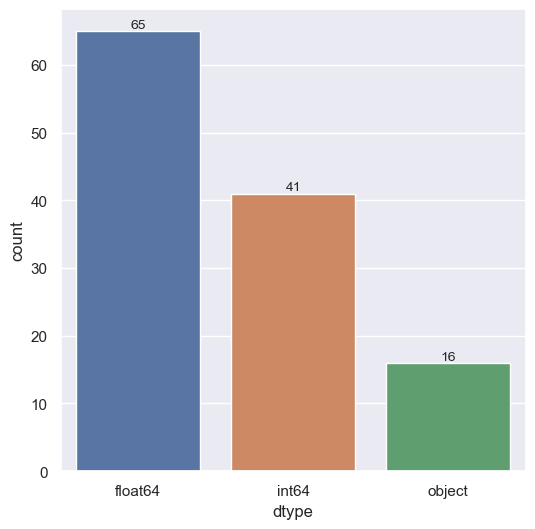

In [9]:
dtypes_df = pd.DataFrame(
    {"column": app_train.dtypes.index, "dtype": app_train.dtypes.values}
)
dtype_counts = dtypes_df.groupby("dtype", as_index=False)["column"].count()
dtype_counts_sorted = dtype_counts.sort_values("column", ascending=False)
dtype_counts_sorted.rename(columns={"column": "count"}, inplace=True)
sns.set(rc = {"figure.figsize": (6, 6)})
ax = sns.barplot(data=dtype_counts_sorted, x="dtype", y="count", hue="dtype")
for container in ax.containers:
    ax.bar_label(container, fontsize=10)
plt.show()

### Categorical features

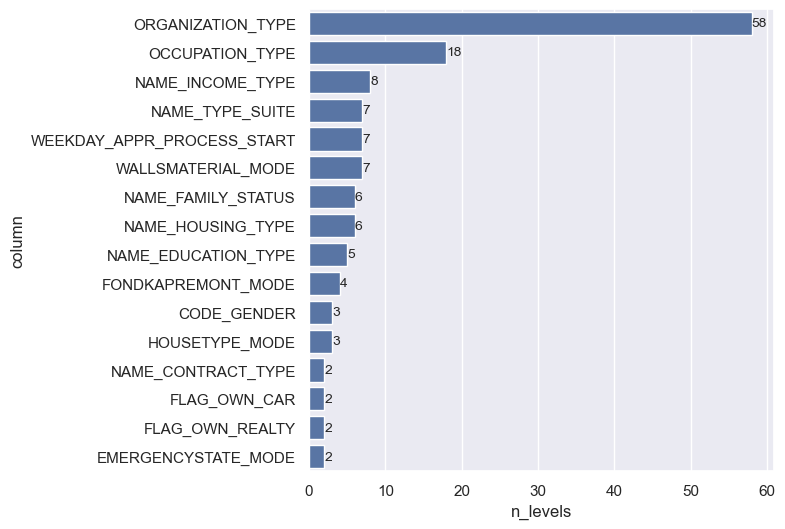

In [10]:
sns.set(rc = {"figure.figsize": (6, 6)})
ax = sns.barplot(data = app_train_dtypes_na[app_train_dtypes_na.dtype == np.dtype("object")]. \
                            sort_values("n_levels", ascending = False), 
                 x = "n_levels", y = "column")
ax.bar_label(ax.containers[0], fontsize = 10);

### Numerical features

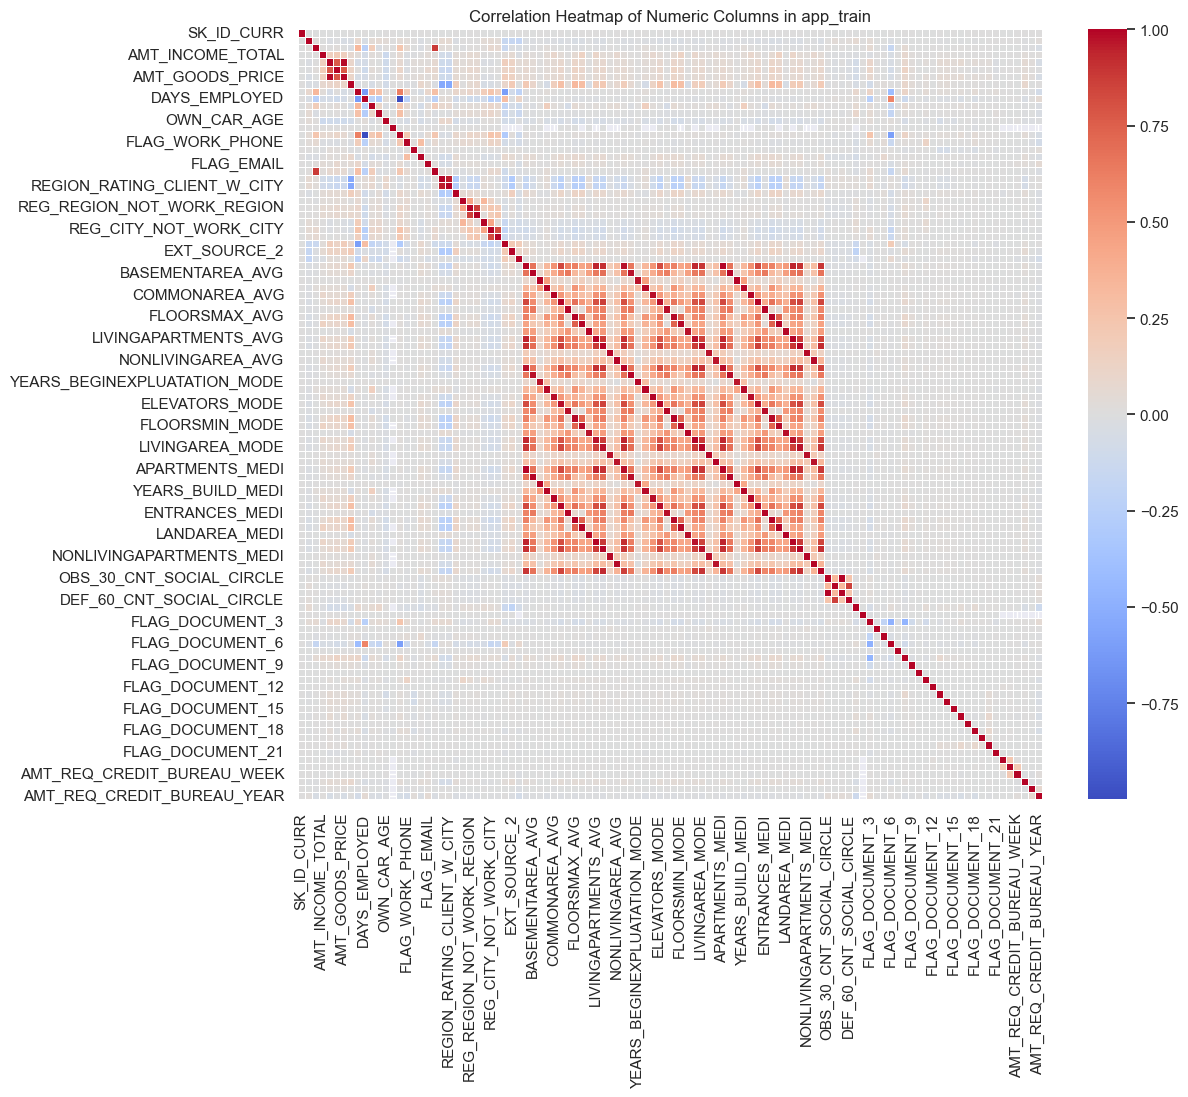

In [11]:
numerical_columns = app_train.select_dtypes(include=['number'])
correlation_matrix = numerical_columns.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap of Numeric Columns in app_train')
plt.show()

The correlation heatmap reveals several clusters of high correlation, which are likely attributed to the nature of the dataset containing average, mode, and median values across various features. These clusters hint at strong interrelationships among specific groups of features. However, this also raises concerns about potential redundancy or multicollinearity within the dataset.

In [12]:
filtered_columns = [col for col in correlation_matrix.columns if not any(suffix in col for suffix in ['_MEDI', '_AVG', '_MODE'])]
correlation_matrix_filtered = correlation_matrix[filtered_columns]
mask = np.triu(np.ones_like(correlation_matrix_filtered, dtype=bool))
correlation_matrix_excl_diag = correlation_matrix_filtered.mask(mask)
stacked_corr = correlation_matrix_excl_diag.stack().reset_index()
stacked_corr.columns = ['Feature 1', 'Feature 2', 'Correlation']

stacked_corr = stacked_corr[stacked_corr['Feature 1'] != stacked_corr['Feature 2']]
stacked_corr['Ordered Features'] = stacked_corr.apply(lambda x: tuple(sorted([x['Feature 1'], x['Feature 2']])), axis=1)
stacked_corr = stacked_corr.drop_duplicates(subset='Ordered Features').drop(columns='Ordered Features')
top_40_correlated_features = pd.concat([
    stacked_corr.nlargest(20, 'Correlation'),
    stacked_corr.nsmallest(20, 'Correlation')
])
print("Top 40 most correlated features:")
print(top_40_correlated_features)

Top 40 most correlated features:
                        Feature 1                    Feature 2  Correlation
2722     OBS_30_CNT_SOCIAL_CIRCLE     OBS_60_CNT_SOCIAL_CIRCLE     0.998490
19                AMT_GOODS_PRICE                   AMT_CREDIT     0.986968
230   REGION_RATING_CLIENT_W_CITY         REGION_RATING_CLIENT     0.950842
173               CNT_FAM_MEMBERS                 CNT_CHILDREN     0.879161
324   LIVE_REGION_NOT_WORK_REGION   REG_REGION_NOT_WORK_REGION     0.860627
2786     DEF_30_CNT_SOCIAL_CIRCLE     DEF_60_CNT_SOCIAL_CIRCLE     0.860517
405       LIVE_CITY_NOT_WORK_CITY       REG_CITY_NOT_WORK_CITY     0.825575
20                AMT_GOODS_PRICE                  AMT_ANNUITY     0.775109
14                    AMT_ANNUITY                   AMT_CREDIT     0.770138
99                 FLAG_EMP_PHONE                   DAYS_BIRTH     0.619888
3256              FLAG_DOCUMENT_6                DAYS_EMPLOYED     0.597484
299    REG_REGION_NOT_WORK_REGION   REG_REGION_NOT_LIVE

### Target of the dataset

In [13]:
print(get_column_description(column_description, "TARGET"))

TARGET: Target variable (1 - client with payment difficulties: he/she had late payment more than X days on at least one of the first Y installments of the loan in our sample, 0 - all other cases)



In [14]:
app_train.TARGET.value_counts(normalize = True)

TARGET
0    0.919271
1    0.080729
Name: proportion, dtype: float64

The proportion of TARGET feature reveals a highly imbalanced dataset for loan default prediction, with approximately 91.93% of instances labeled as non-default and only 8.07% as default. This class imbalance poses challenges for machine learning models, potentially leading to biases towards the majority class and poor performance in predicting defaults. To mitigate this issue, appropriate evaluation metrics such as precision, recall, and F1-score should be prioritized over accuracy. 

## Identifying Loans Risk Factors

### Loan Profile Analysis

In [15]:
loan_cat_features = [
    "NAME_CONTRACT_TYPE"
]

loan_num_features = [
    "AMT_CREDIT",
    "AMT_ANNUITY"
]


loan_features = loan_cat_features + loan_num_features

In [16]:
print(get_column_description(column_description, loan_features))

NAME_CONTRACT_TYPE: Identification if loan is cash or revolving
AMT_CREDIT: Credit amount of the loan
AMT_ANNUITY: Loan annuity



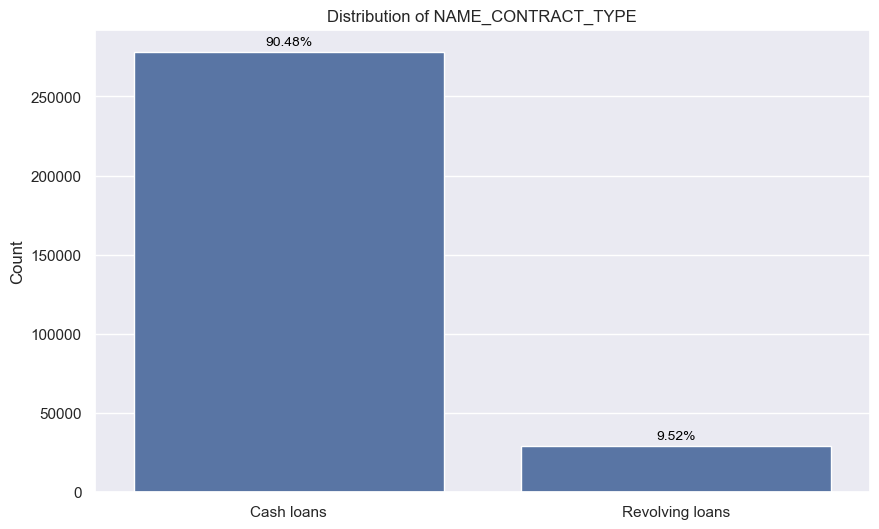

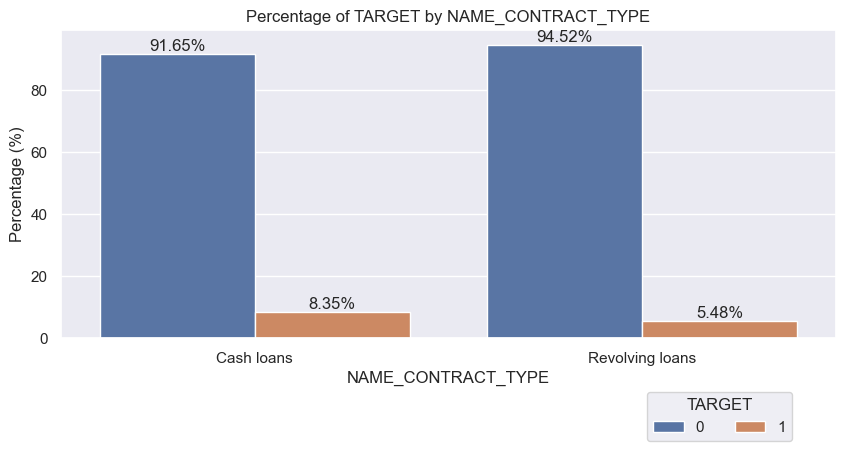

In [17]:
for feature in loan_cat_features:
    plot_cat_feature_distribution(app_train, feature)
    plot_cat_feature_target_re(app_train, feature)

The graph illustrates that cash loans exhibit a default rate of 8.35%, whereas revolving loans show a lower default rate of 5.48%. This disparity in default rates suggests that individuals with cash loans are more likely to default on their payments compared to those with revolving loans.

<Figure size 600x600 with 0 Axes>

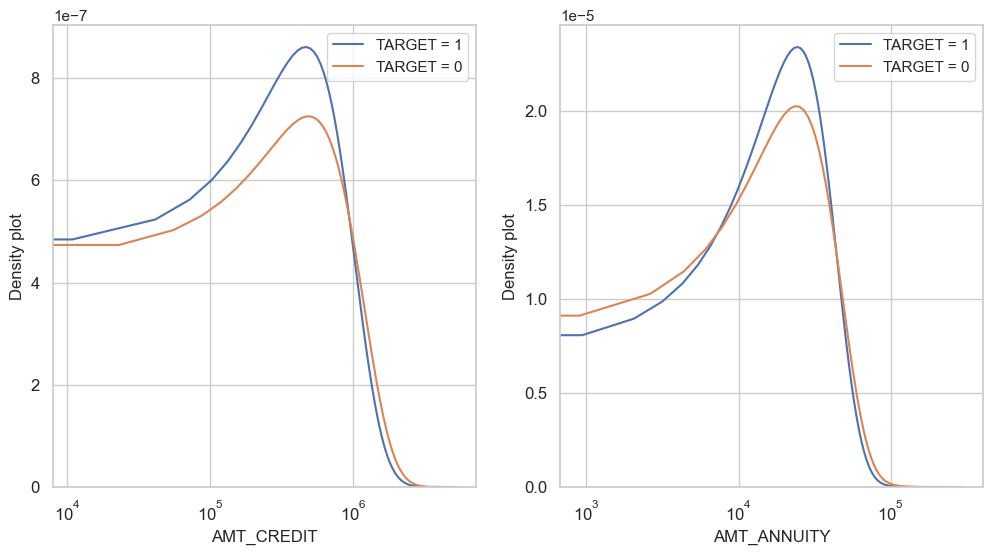

In [18]:
plot_distribution_comparison_logx(app_train, loan_num_features, nrow=1)

The loan amount plot (AMT_CREDIT) suggests that default loans tend to have higher risk on lower credit amounts compared to non-default loans. This indicates a risk with small to medium loans, showing the importance of careful lending decisions. Meanwhile, the annuity payment plot (AMT_ANNUITY) shows that there is more density of defaulted loans in the average payments, they decrease compared to non-default loans over time.

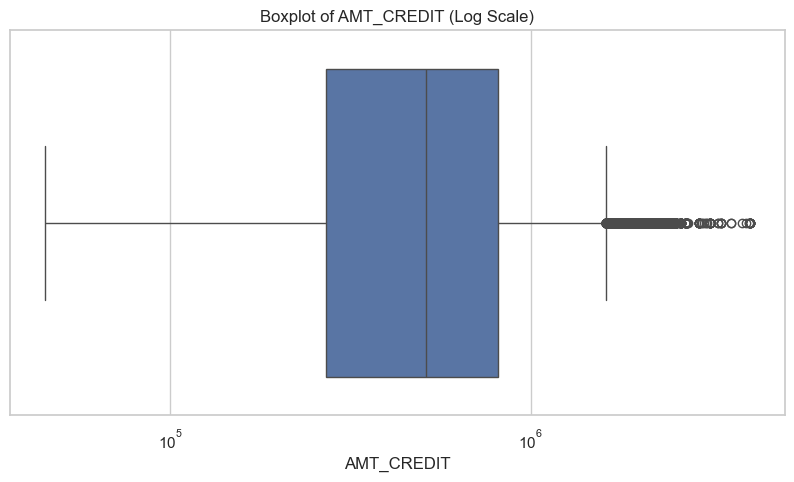

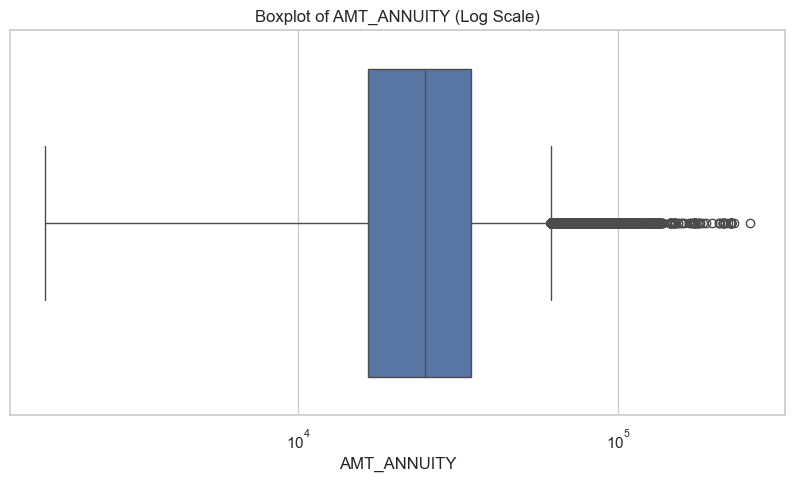

In [19]:
for feature in loan_num_features:
    plot_boxplot_logx(app_train, feature)


After plotting the boxplots of both AMT_CREDIT and AMT_ANNUITY with a logarithmic scale, it is evident that both features have a significant number of outliers, as indicated by the data points outside the box. These outliers suggest that there are loan amounts and annuities that are substantially higher than the typical range of values.

In [20]:
outliers_credit = classify_outliers(app_train, 'AMT_CREDIT')
non_outliers_credit = app_train.drop(outliers_credit.index)
outliers_annuity = classify_outliers(app_train, 'AMT_ANNUITY')
non_outliers_annuity = app_train.drop(outliers_annuity.index)

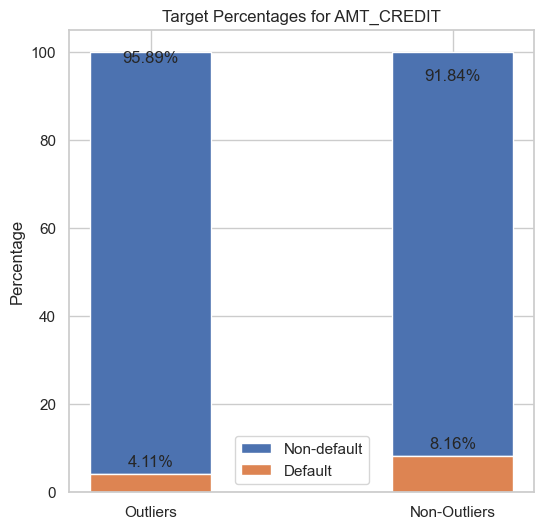

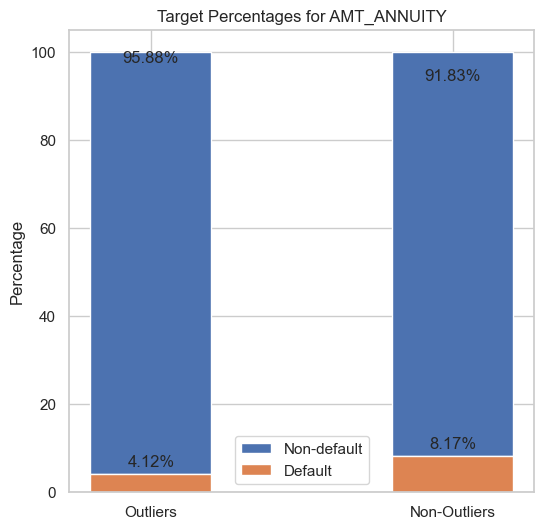

In [21]:
plot_target_percentages(outliers_credit, non_outliers_credit, 'Target Percentages for AMT_CREDIT')
plot_target_percentages(outliers_annuity, non_outliers_annuity, 'Target Percentages for AMT_ANNUITY')

In [22]:
categorical_features = ['AMT_CREDIT', 'AMT_ANNUITY']
chi_squared_test_for_features(app_train, categorical_features)

Chi-squared test results for AMT_CREDIT:
Chi-squared statistic: 9896.135973496413
P-value: 5.281104374655702e-243
Conclusion: There is a significant association between AMT_CREDIT and TARGET.

Chi-squared test results for AMT_ANNUITY:
Chi-squared statistic: 20298.954816131216
P-value: 1.6940258984707805e-268
Conclusion: There is a significant association between AMT_ANNUITY and TARGET.



Both AMT_CREDIT and AMT_ANNUITY exhibit statistically significant associations with the target variable TARGET, suggesting that they are potentially important factors in predicting loan default.

The analysis reveals notable insights into loan default risk factors. Cash loans exhibit a significantly higher default rate of 8.35% compared to revolving loans at 5.48%, highlighting the elevated risk associated with cash loans. Additionally, the assessment of loan amount (AMT_CREDIT) suggests a higher default likelihood for lower credit amounts, while annuity payments (AMT_ANNUITY) show a concentration of defaulted loans in the average payment range, indicating a decrease in default risk over time. Moreover, both loan amount and annuity payments display numerous outliers, warranting further investigation. Finally, statistical tests confirm significant associations between loan default and both loan amount and annuity payments, underscoring their importance in predicting default risk. 

### Client Data Analysis

In this part of the exploratory data analysis (EDA), we focus on analyzing the client's loan information dataset to identify potential risk factors associated with loan default. Through examination of the data, we aim to uncover patterns, trends, and correlations that may influence the likelihood of loan default.

### Gender and Education Insights: Analyzing Financial Behavior

In [23]:
cat_features = [
    "CODE_GENDER",
    "NAME_EDUCATION_TYPE"

]

In [24]:
print(get_column_description(column_description, cat_features))

CODE_GENDER: Gender of the client
NAME_EDUCATION_TYPE: Level of highest education the client achieved



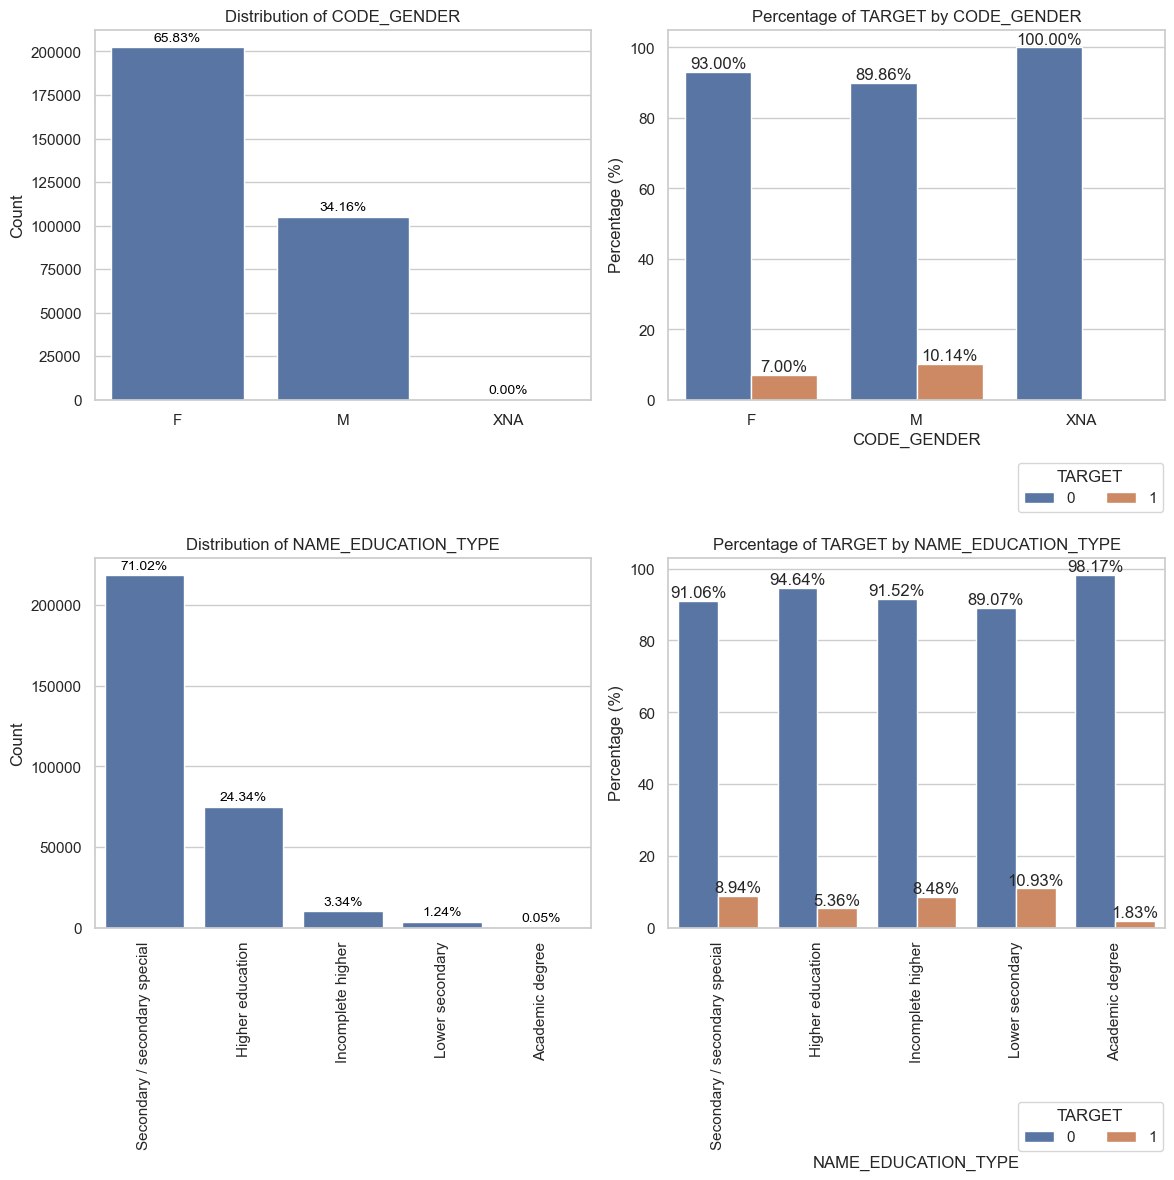

In [25]:
plot_cat_features(app_train, cat_features)

Graphs reveals significant associations between gender and education levels with default rates. The graph illustrates notable disparities in default rates across different genders and educational backgrounds. Such findings underscore the importance of considering gender and education as influential factors in predicting loan default.

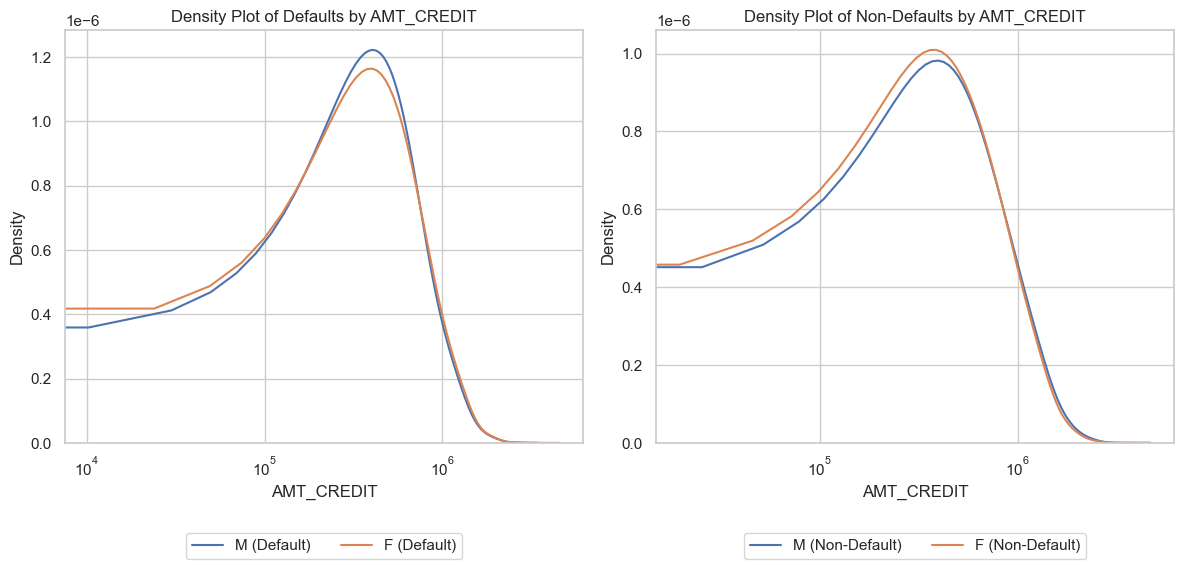

In [26]:
plot_AMT_comparison(app_train, 'CODE_GENDER', 'TARGET', 'AMT_CREDIT')

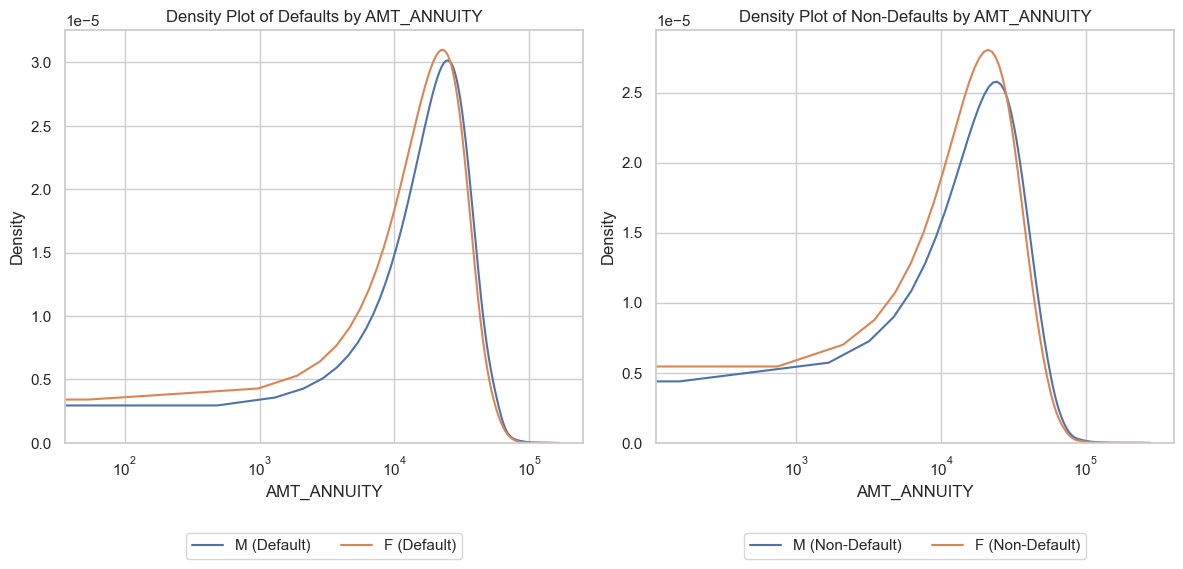

In [27]:
plot_AMT_comparison(app_train, 'CODE_GENDER', 'TARGET', 'AMT_ANNUITY')

In analyzing defaults by credit amount based on gender, it's evident that males tend to default less on small loans but more on medium-sized loans compared to females. Moreover, examining the density charts for annuities reveals that default rates among female borrowers are slightly higher for lower annuity amounts, a trend also observed in non-default loans.

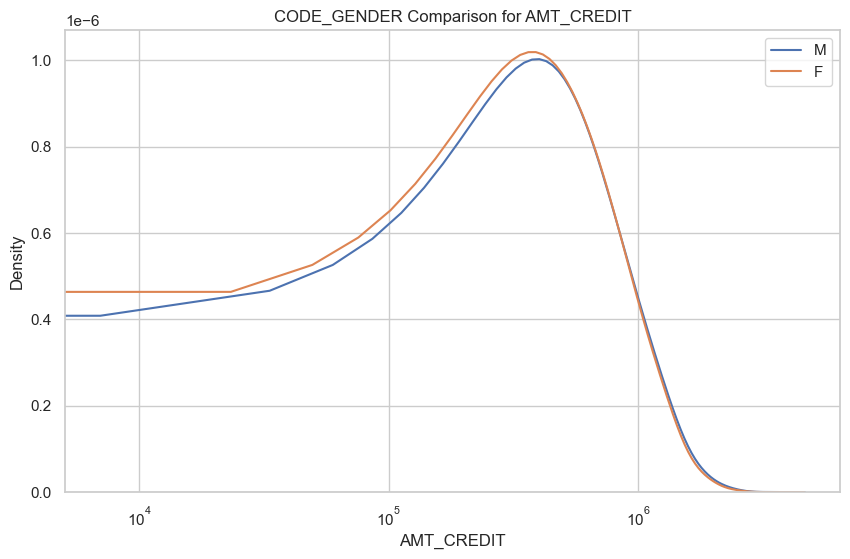

In [28]:
plot_density_comparison(app_train, 'CODE_GENDER', 'AMT_CREDIT')

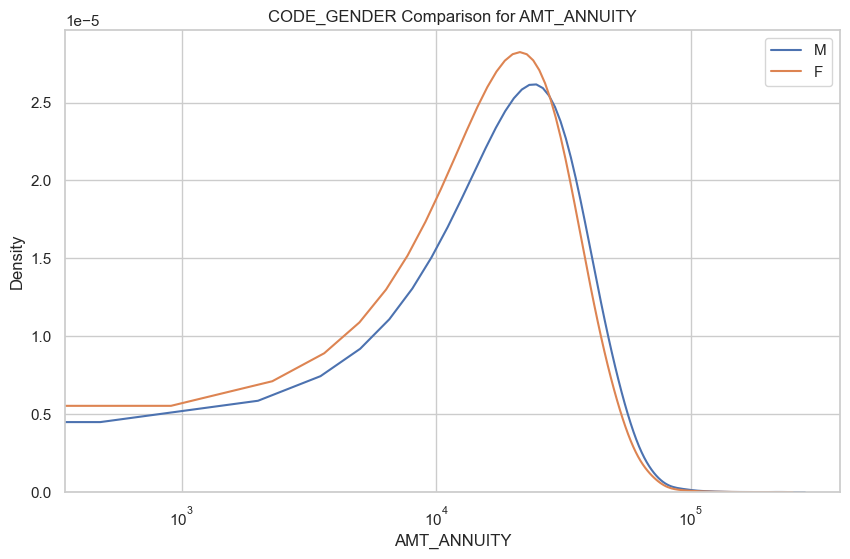

In [29]:
plot_density_comparison(app_train, 'CODE_GENDER', 'AMT_ANNUITY')

In [30]:
gender_avg_credit = app_train.groupby('CODE_GENDER')['AMT_CREDIT'].mean()
gender_avg_credit_default = app_train[app_train['TARGET'] == 1].groupby('CODE_GENDER')['AMT_CREDIT'].mean()
gender_avg_credit_non_default = app_train[app_train['TARGET'] == 0].groupby('CODE_GENDER')['AMT_CREDIT'].mean()

gender_avg_annuity = app_train.groupby('CODE_GENDER')['AMT_ANNUITY'].mean()
gender_avg_annuity_default = app_train[app_train['TARGET'] == 1].groupby('CODE_GENDER')['AMT_ANNUITY'].mean()
gender_avg_annuity_non_default = app_train[app_train['TARGET'] == 0].groupby('CODE_GENDER')['AMT_ANNUITY'].mean()

gender_data = pd.DataFrame({
    'Average_AMT_CREDIT': gender_avg_credit,
    'Average_AMT_CREDIT_Default': gender_avg_credit_default,
    'Average_AMT_CREDIT_Non_Default': gender_avg_credit_non_default,
    'Average_AMT_ANNUITY': gender_avg_annuity,
    'Average_AMT_ANNUITY_Default': gender_avg_annuity_default,
    'Average_AMT_ANNUITY_Non_Default': gender_avg_annuity_non_default
})
gender_data = gender_data.drop("XNA", axis=0)
print(round(gender_data.T,2))

CODE_GENDER                              F          M
Average_AMT_CREDIT               592766.72  611095.20
Average_AMT_CREDIT_Default       561140.13  553307.96
Average_AMT_CREDIT_Non_Default   595146.97  617617.41
Average_AMT_ANNUITY               26304.82   28657.68
Average_AMT_ANNUITY_Default       25584.22   27675.35
Average_AMT_ANNUITY_Non_Default   26359.05   28768.56


In [31]:
chi_squared_test_for_features(app_train, ["CODE_GENDER"])

Chi-squared test results for CODE_GENDER:
Chi-squared statistic: 920.7913340361749
P-value: 1.1290217848908289e-200
Conclusion: There is a significant association between CODE_GENDER and TARGET.



The data analysis reveals a notable trend indicating that females tend to opt for smaller loans compared to males, resulting in lower annuity payments. This observation suggests that females may adopt a more conservative approach to managing their finances, opting for smaller loan amounts that entail lower monthly payment obligations. This tendency towards lower-risk financial decisions aligns with broader behavioral patterns seen in financial planning and risk management. Consequently, the data hints at a gender-related disparity in financial risk-taking behavior, with females displaying a preference for lower-risk financial strategies, as evidenced by their tendency to secure smaller loans with correspondingly lower annuity payments.

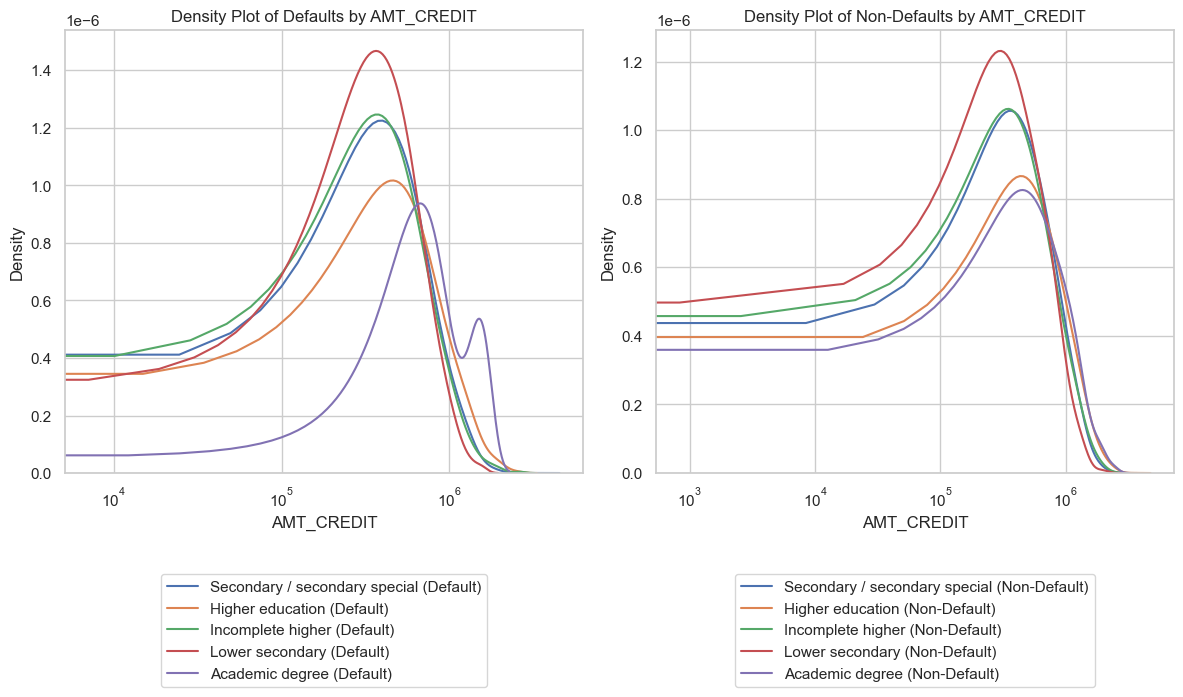

In [32]:
plot_AMT_comparison(app_train, 'NAME_EDUCATION_TYPE', 'TARGET', 'AMT_CREDIT')

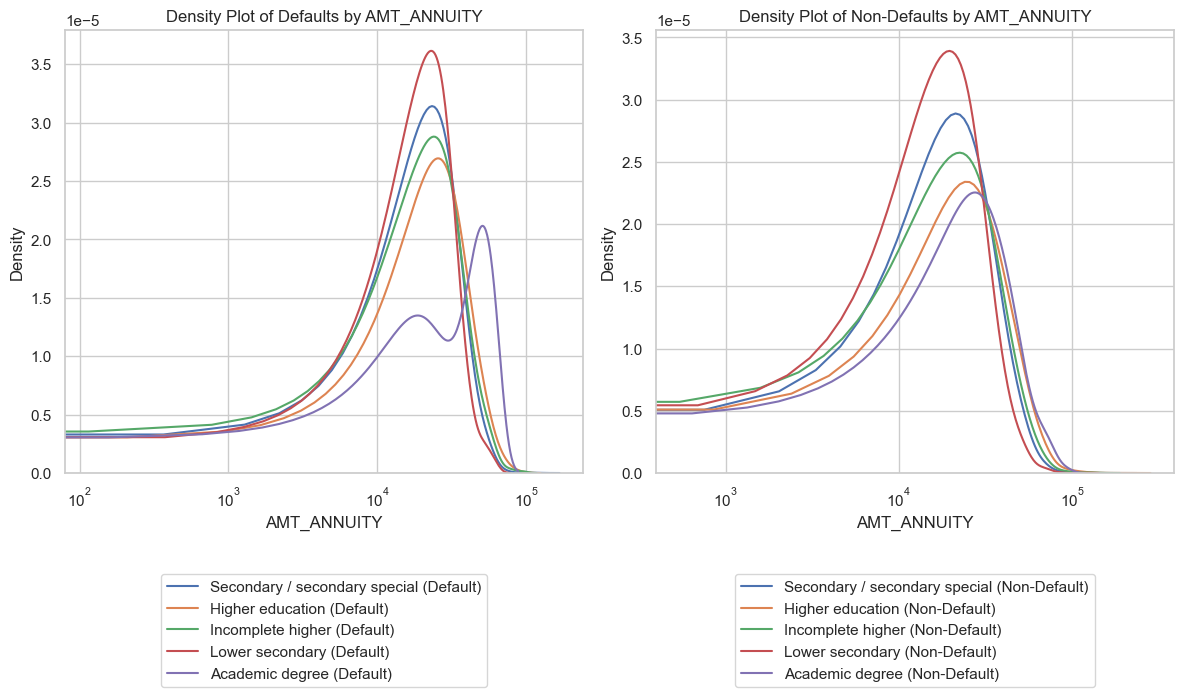

In [33]:
plot_AMT_comparison(app_train, 'NAME_EDUCATION_TYPE', 'TARGET', 'AMT_ANNUITY')

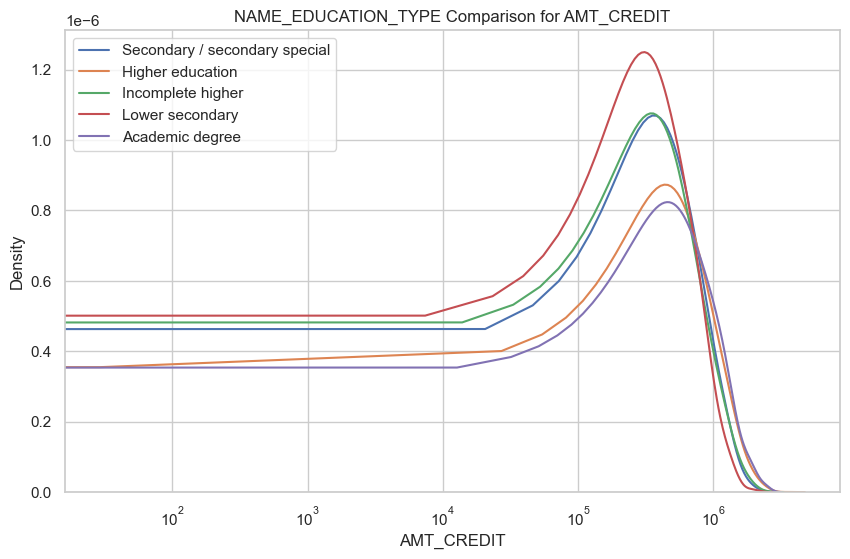

In [34]:
plot_density_comparison(app_train, 'NAME_EDUCATION_TYPE', 'AMT_CREDIT')

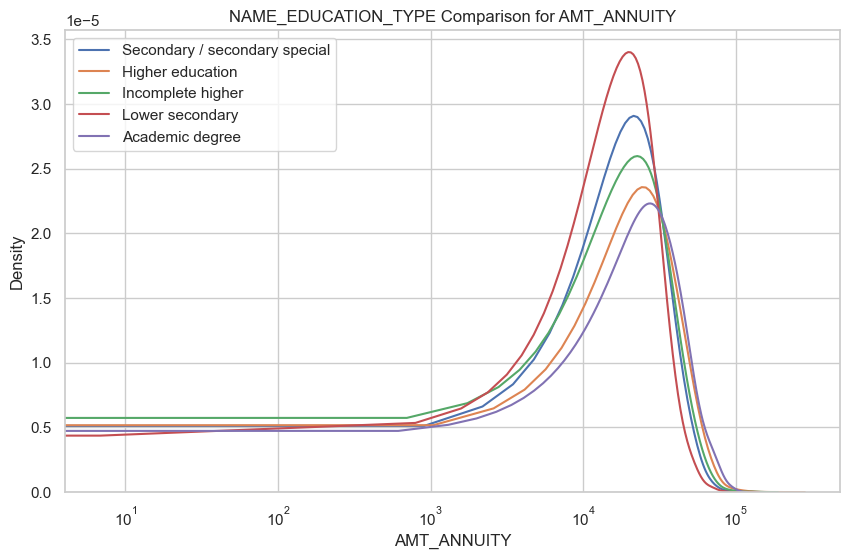

In [35]:
plot_density_comparison(app_train, 'NAME_EDUCATION_TYPE', 'AMT_ANNUITY')

In [36]:
chi_squared_test_for_features(app_train, ["NAME_EDUCATION_TYPE"])

Chi-squared test results for NAME_EDUCATION_TYPE:
Chi-squared statistic: 1019.2131873088356
P-value: 2.4476812052198174e-219
Conclusion: There is a significant association between NAME_EDUCATION_TYPE and TARGET.



There is a noticeable trend among borrowers with higher education levels, who tend to secure larger loan amounts. Additionally, this group demonstrates lower default rates compared to borrowers with lower educational attainment. This suggests a potential correlation between education level and financial responsibility, where individuals with higher education may exhibit more stable financial behaviors and thus pose a lower default risk to lenders.

### Exploring Borrower Demographics and Social Dynamics

This section delves into the analysis of features related to borrower demographics and social dynamics. By examining these features, we aim to uncover insights into their potential influence on loan behaviors and outcomes. Through the exploration of various aspects such as family composition, social support networks, and demographic characteristics, we seek to identify patterns and correlations that may shed light on the relationship between borrower background and loan performance.

In [37]:
features = [
    "NAME_TYPE_SUITE",
    "CNT_FAM_MEMBERS",
    "CNT_CHILDREN",
    "NAME_FAMILY_STATUS",
    "DAYS_BIRTH",
]

In [38]:
print(get_column_description(column_description, features))

NAME_TYPE_SUITE: Who was accompanying client when he was applying for the loan
CNT_FAM_MEMBERS: How many family members does client have
CNT_CHILDREN: Number of children the client has
NAME_FAMILY_STATUS: Family status of the client
DAYS_BIRTH: Client's age in days at the time of application



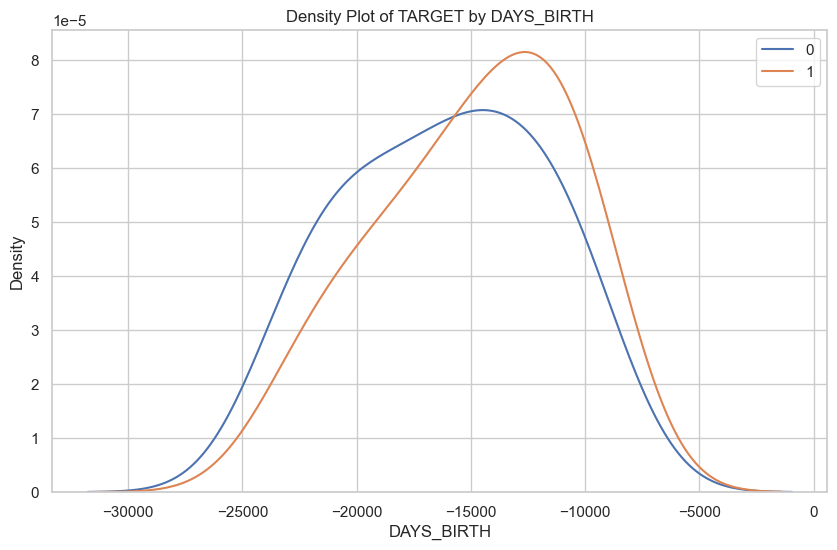

In [39]:
plot_AMT_comparison_num(app_train, 'TARGET', 'DAYS_BIRTH')

In [40]:
avg_age_default = -app_train.loc[app_train['TARGET'] == 1, 'DAYS_BIRTH'].mean() / 365
avg_age_non_default = -app_train.loc[app_train['TARGET'] == 0, 'DAYS_BIRTH'].mean() / 365

print("Average age for default loans:", round(avg_age_default,2), "years")
print("Average age for non-default loans:", round(avg_age_non_default,2), "years")

Average age for default loans: 40.78 years
Average age for non-default loans: 44.21 years


The null hypothesis: There is no significant difference in the average age between borrowers who defaulted on their loans and those who did not default.

The alternative hypothes: T there is a significant difference in the average age between borrowers who defaulted on their loans and those who did not default.

In [41]:
default_loans_age = app_train[app_train['TARGET'] == 1]['DAYS_BIRTH'] / 365.25  # Convert days to years
non_default_loans_age = app_train[app_train['TARGET'] == 0]['DAYS_BIRTH'] / 365.25  # Convert days to years

t_statistic, p_value = ttest_ind(default_loans_age, non_default_loans_age, equal_var=False)
print("Two-sample t-test results:")
print(f"T-statistic: {t_statistic}")
print(f"P-value: {p_value}")

Two-sample t-test results:
T-statistic: 45.00618796126954
P-value: 0.0


The two-sample t-test results indicate a highly statistically significant difference in the average age between default and non-default loans. The t-statistic value of 45.006 suggests that the difference in means is substantial. Additionally, the p-value of 0.0 is less than any conventional significance level (such as 0.05), providing strong evidence against the null hypothesis. Therefore, we can confidently conclude that there is a significant difference in the average age of borrowers who defaulted on their loans compared to those who did not default.

The analysis reveals that there is a notable difference in the average age between default and non-default loans. On average, individuals who default on loans are younger, with an average age of approximately 40.78 years, compared to those who do not default, whose average age is approximately 44.21 years. This suggests that age may play a significant role in loan default risk, with younger individuals being more susceptible to defaulting on their loans.

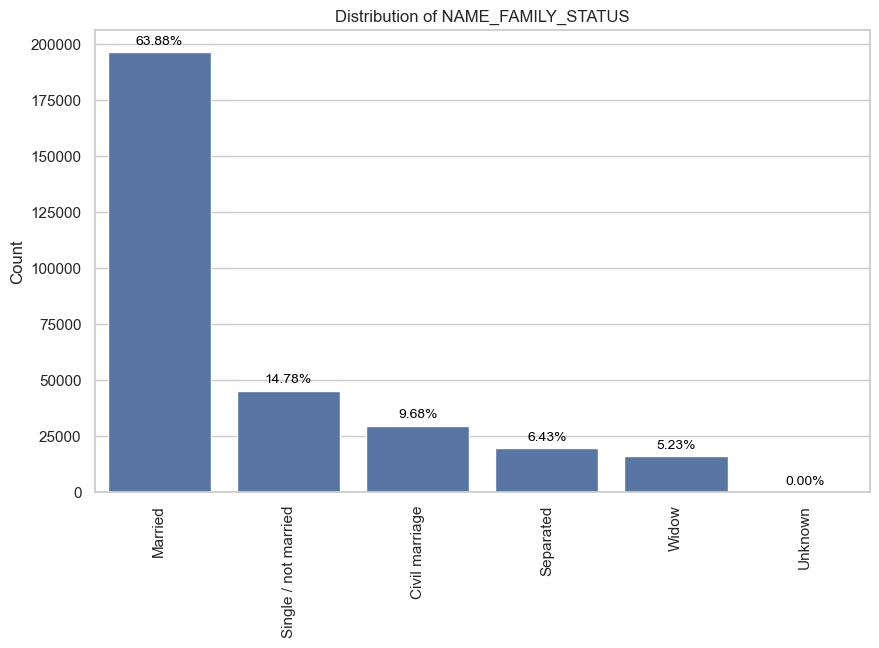

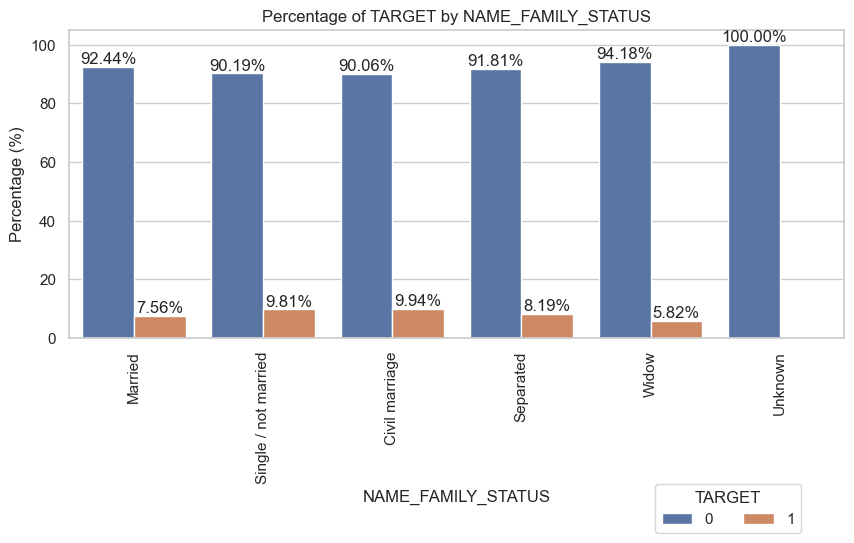

In [42]:
plot_cat_feature_distribution(app_train, "NAME_FAMILY_STATUS")
plot_cat_feature_target_re(app_train, "NAME_FAMILY_STATUS")

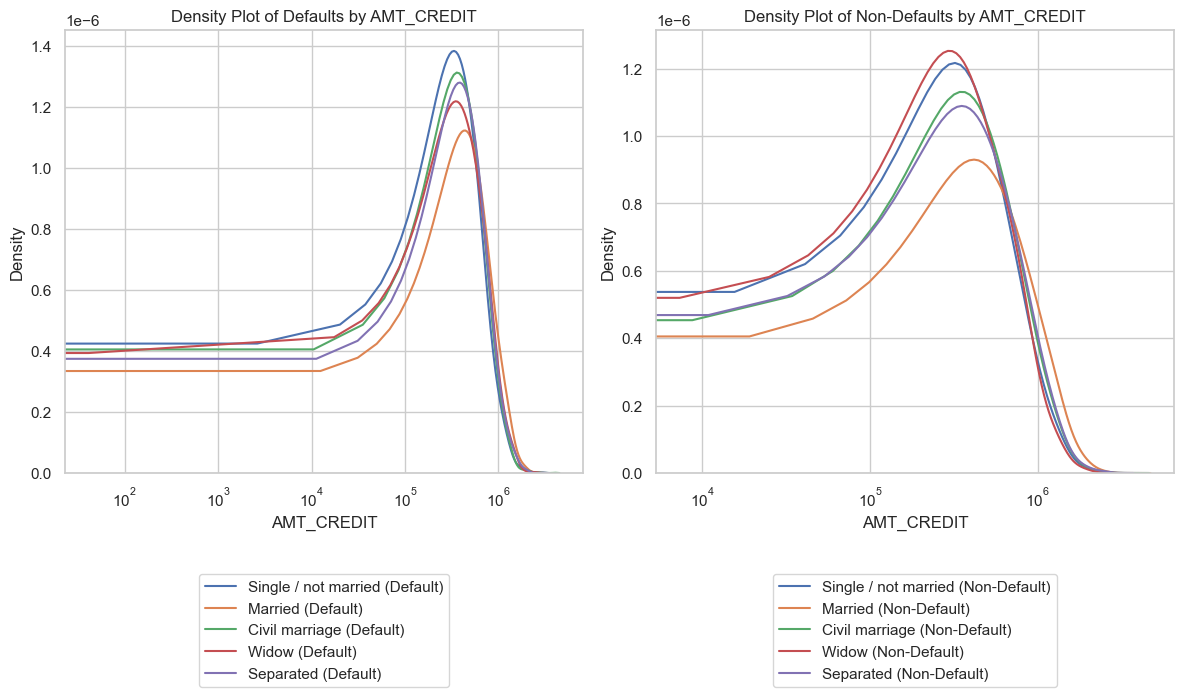

In [43]:
plot_AMT_comparison(app_train[app_train['NAME_FAMILY_STATUS'] != "Unknown"], 'NAME_FAMILY_STATUS', 'TARGET', 'AMT_CREDIT')

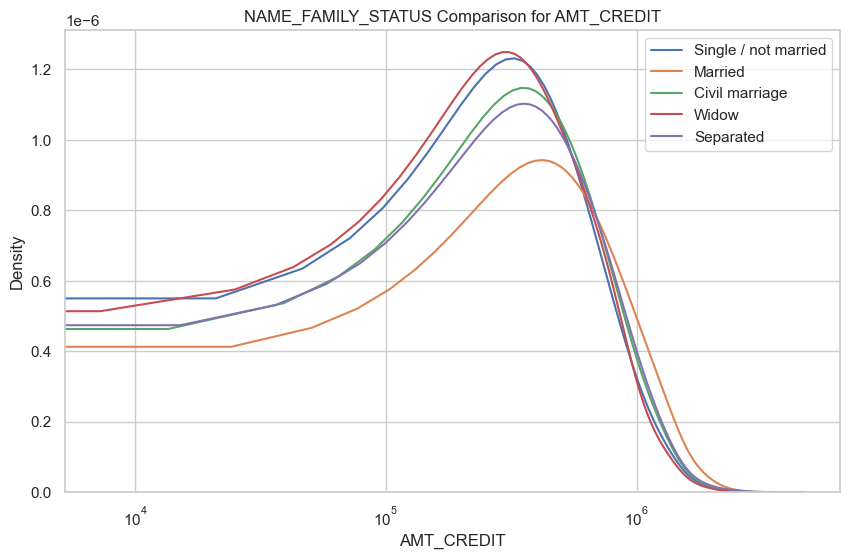

In [44]:
plot_density_comparison(app_train[app_train['NAME_FAMILY_STATUS'] != "Unknown"], 'NAME_FAMILY_STATUS', 'AMT_CREDIT')

The analysis of loan default rates across different family statuses reveals significant trends. Single individuals demonstrate a higher likelihood of facing financial challenges, reflected in their increased default rates and tendency to borrow smaller loan amounts. Conversely, married couples exhibit more favorable loan repayment behavior, characterized by lower default rates and access to higher loan amounts. Interestingly, widows, while having the lowest default percentages, also tend to secure smaller loan amounts compared to other family statuses. These findings underscore the intricate relationship between family status and loan performance, emphasizing the need for tailored financial solutions to accommodate diverse borrower profiles.

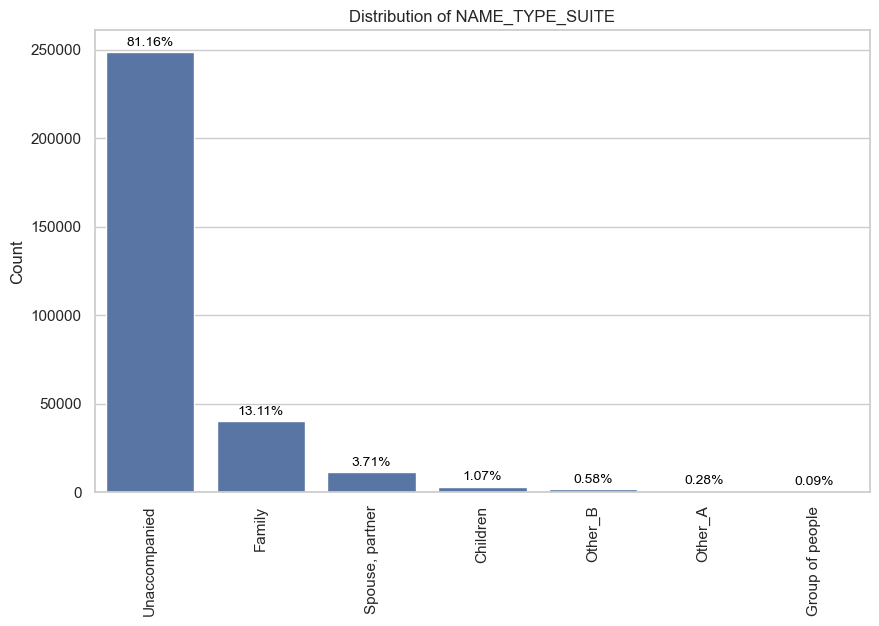

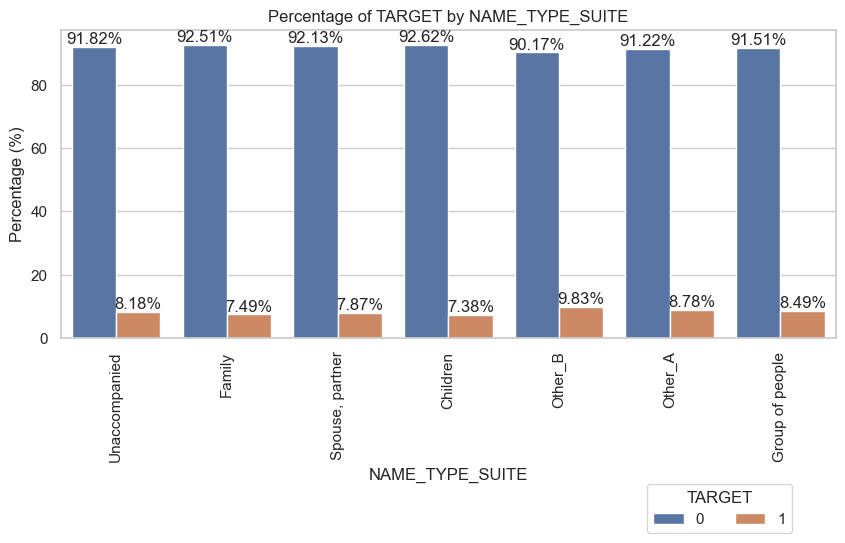

In [45]:
plot_cat_feature_distribution(app_train, "NAME_TYPE_SUITE")
plot_cat_feature_target_re(app_train, "NAME_TYPE_SUITE")

In [46]:
chi_squared_test_for_features(app_train, ["NAME_TYPE_SUITE"])

Chi-squared test results for NAME_TYPE_SUITE:
Chi-squared statistic: 32.825314655829914
P-value: 1.1329313903575907e-05
Conclusion: There is a significant association between NAME_TYPE_SUITE and TARGET.



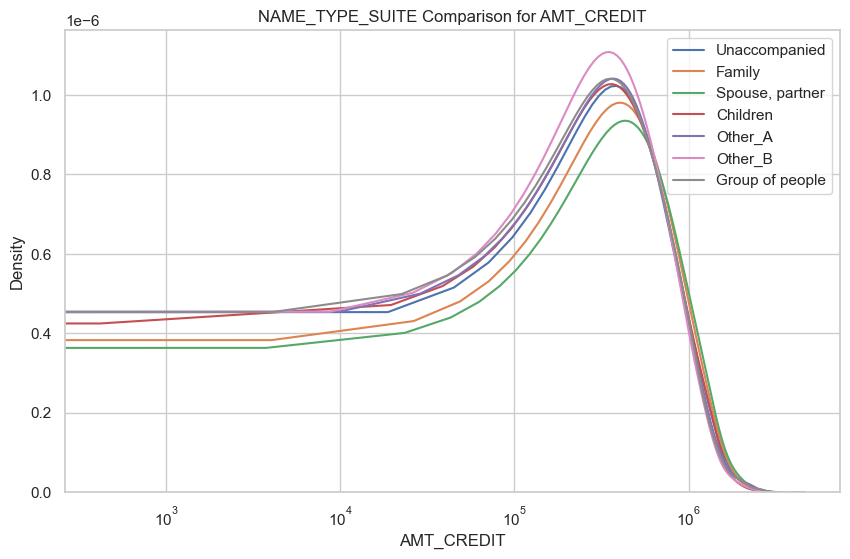

In [47]:
plot_density_comparison(app_train, 'NAME_TYPE_SUITE', 'AMT_CREDIT')

The analysis reveals significant insights into the borrowing behavior and default risk among different borrower types. Particularly noteworthy is the trend observed among married individuals or those accompanied by family members, who consistently exhibit a preference for larger loan amounts. Additionally, this demographic segment demonstrates a notable characteristic of below-average default risk, suggesting a more stable financial profile compared to other borrower categories.

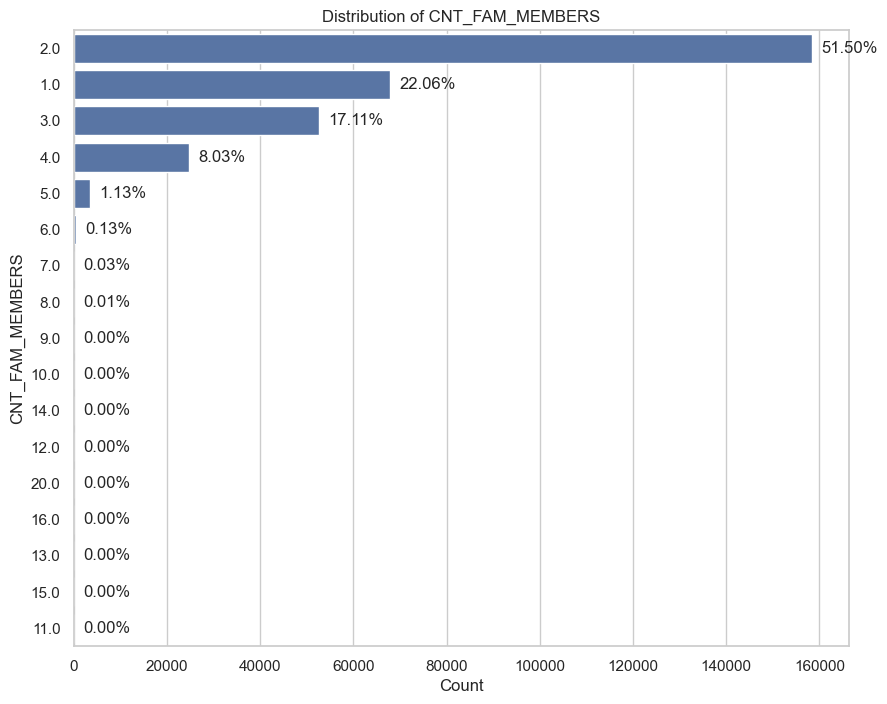

In [48]:
plot_cat_feature_distribution(app_train,'CNT_FAM_MEMBERS')

In [49]:
chi_squared_test_for_features(app_train, ['CNT_FAM_MEMBERS'])

Chi-squared test results for CNT_FAM_MEMBERS:
Chi-squared statistic: 167.43732282700557
P-value: 2.730183369578918e-27
Conclusion: There is a significant association between CNT_FAM_MEMBERS and TARGET.



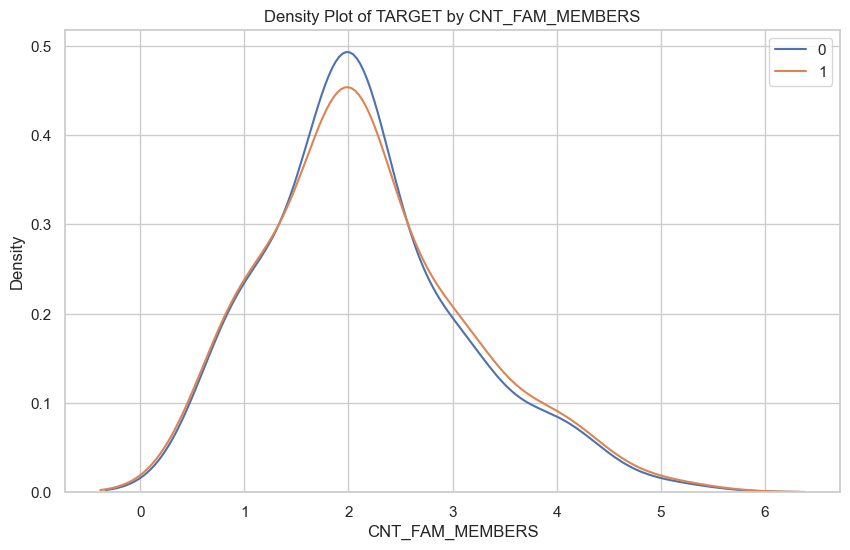

In [50]:
filtered_app_train = app_train[app_train['CNT_FAM_MEMBERS'] < 6]
plot_AMT_comparison_num(filtered_app_train, 'TARGET', 'CNT_FAM_MEMBERS')

The conclusions drawn from the graph indicate that the default risk tends to be lower for households with two family members and higher for households with three to five family members.

In [51]:
chi_squared_test_for_features(app_train, ['CNT_CHILDREN'])

Chi-squared test results for CNT_CHILDREN:
Chi-squared statistic: 185.45178705332776
P-value: 5.0610885260965e-32
Conclusion: There is a significant association between CNT_CHILDREN and TARGET.



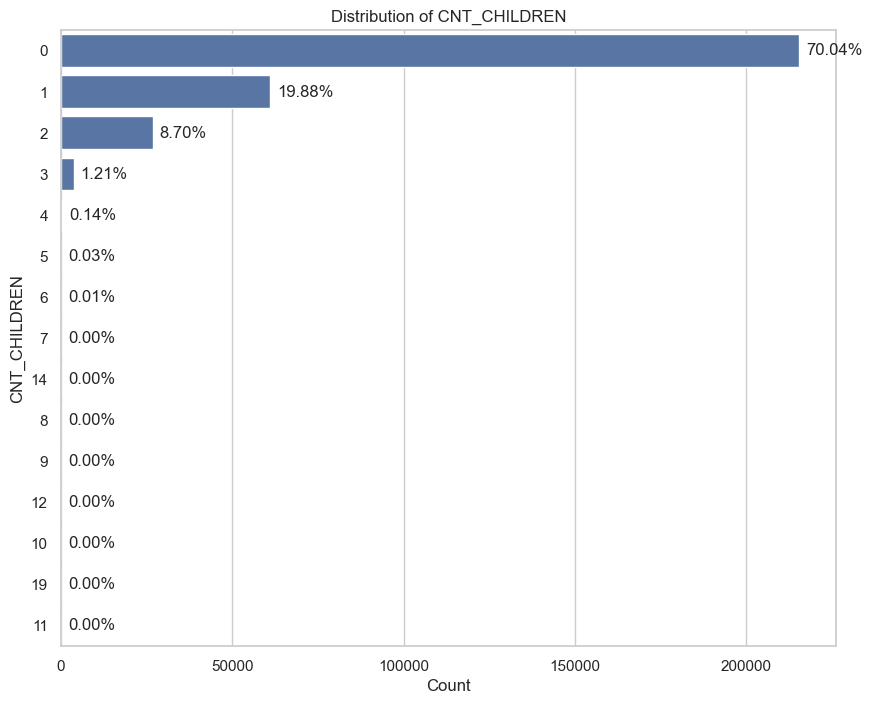

In [52]:
plot_cat_feature_distribution(app_train,"CNT_CHILDREN")

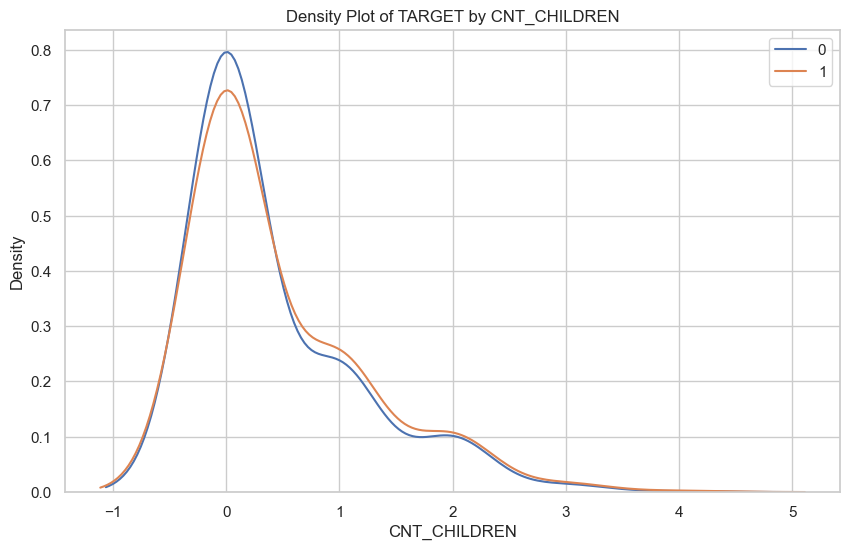

In [53]:
filtered_app_train = app_train[app_train["CNT_CHILDREN"] < 5]
plot_AMT_comparison_num(filtered_app_train, 'TARGET', "CNT_CHILDREN")

The graph suggests that having no children is associated with a lower risk of default compared to having children. This indicates that the presence of children may be a factor influencing the likelihood of default on loans.

### Exploratory Data Analysis on Ownership and Financial Features

In this chapter, we delve into an in-depth analysis of various features related to ownership and financial aspects of the clients. The exploration focuses on understanding patterns, trends, and relationships within the dataset concerning ownership of assets such as cars and real estate, as well as financial attributes like income, employment status, and housing type. By examining these features, we aim to uncover valuable insights that can provide a deeper understanding of the clients' financial behaviors and potential risk factors.

In [54]:
features = [
    "NAME_INCOME_TYPE",
    "AMT_INCOME_TOTAL",
    "OCCUPATION_TYPE",
    "ORGANIZATION_TYPE",
    "DAYS_EMPLOYED"
]

In [55]:
print(get_column_description(column_description, features))

NAME_INCOME_TYPE: Clients income type (businessman, working, maternity leave,)
AMT_INCOME_TOTAL: Income of the client
OCCUPATION_TYPE: What kind of occupation does the client have
ORGANIZATION_TYPE: Type of organization where client works
DAYS_EMPLOYED: How many days before the application the person started current employment



**Financial Data**

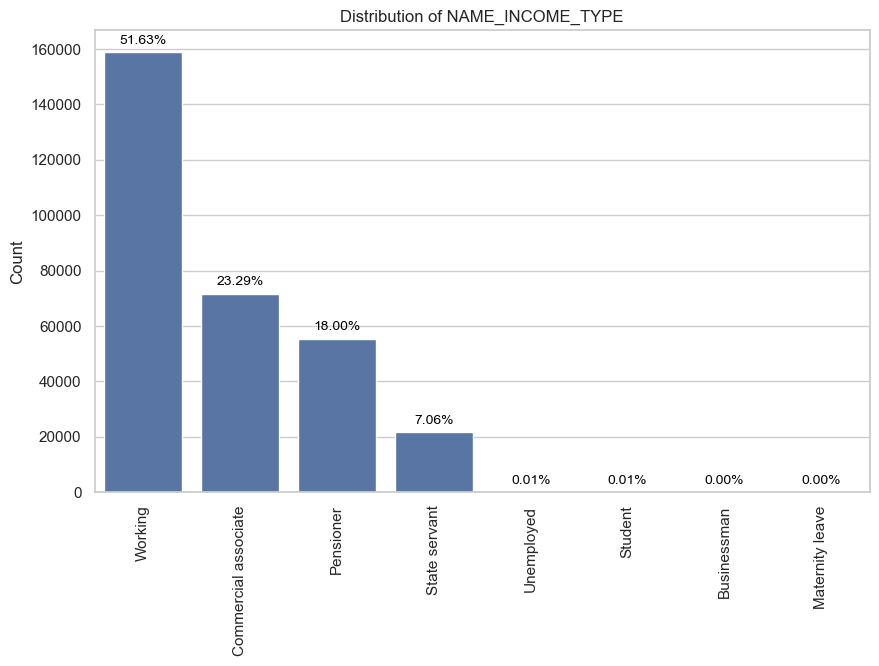

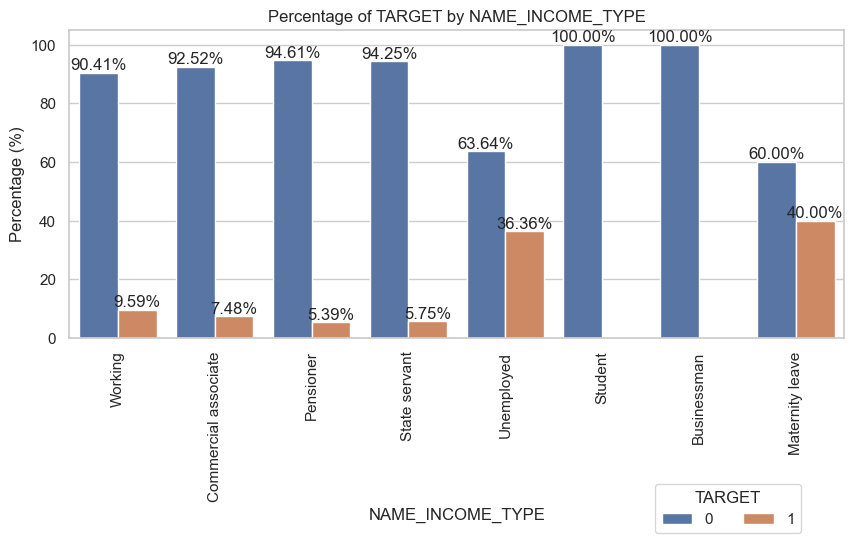

In [56]:
plot_cat_feature_distribution(app_train, "NAME_INCOME_TYPE")
plot_cat_feature_target_re(app_train, "NAME_INCOME_TYPE")

Based on the provided count of clients across different income types, it is evident that certain groups are significantly underrepresented in the dataset. Specifically, the "Unemployed," "Student," "Businessman," and "Maternity leave" categories comprise very few observations compared to the other groups. Consequently, for the purpose of analysis and drawing meaningful conclusions, the focus will primarily be on the more represented income types: "Working," "Commercial associate," "Pensioner," and "State servant." These groups are more adequately represented in the dataset and are likely to provide more reliable insights into income-related patterns and behaviors among clients.

In [57]:
selected_income_types = ["Working", "Commercial associate", "Pensioner", "State servant"]
filtered_app_train = app_train[app_train["NAME_INCOME_TYPE"].isin(selected_income_types)]

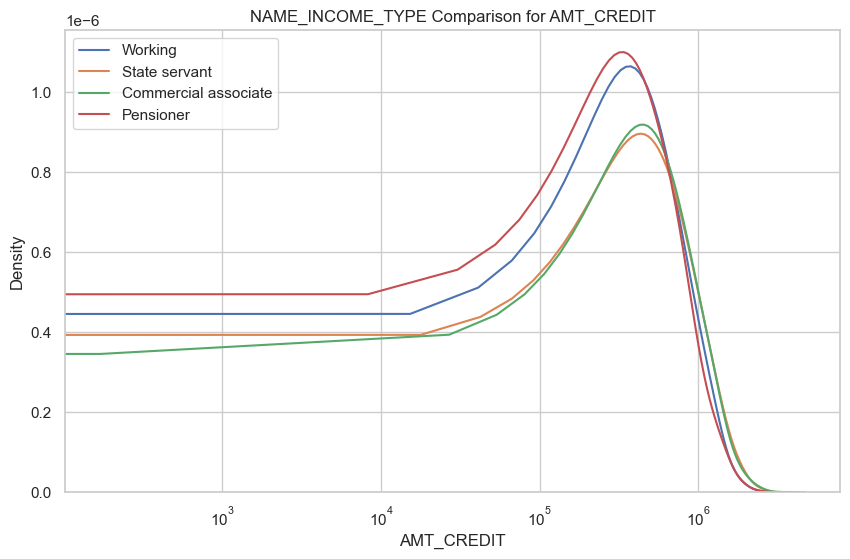

In [58]:
plot_density_comparison(filtered_app_train, 'NAME_INCOME_TYPE', 'AMT_CREDIT')

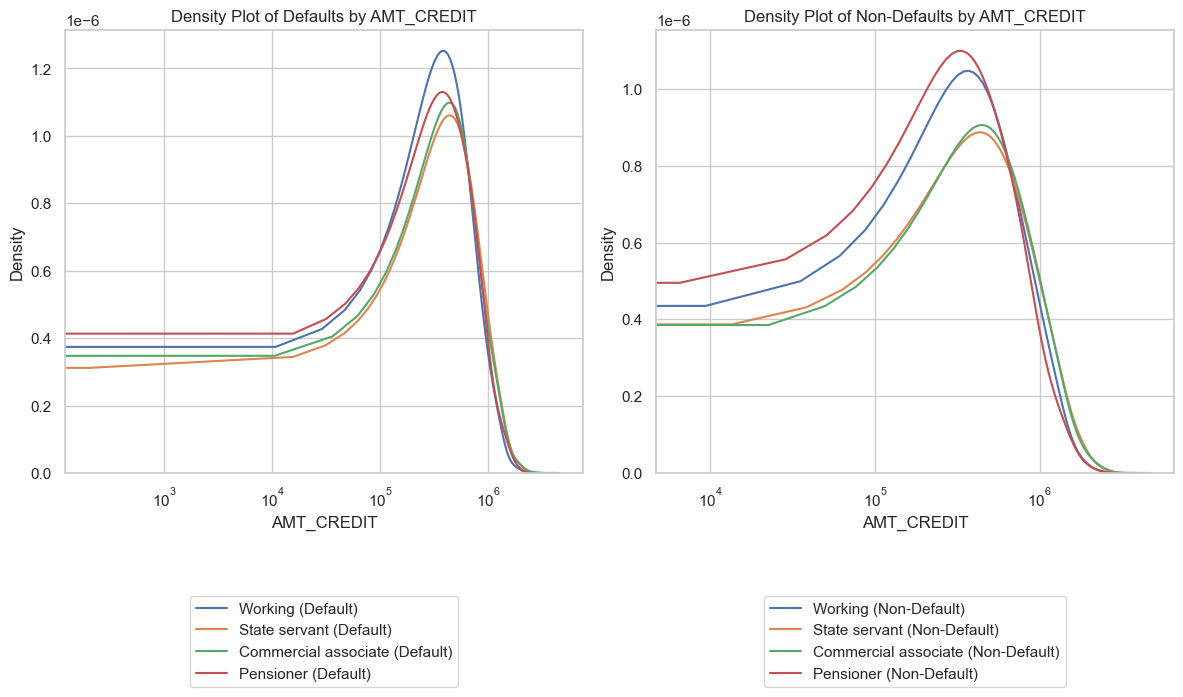

In [59]:
plot_AMT_comparison(filtered_app_train, 'NAME_INCOME_TYPE', 'TARGET', 'AMT_CREDIT')

The visualizations illustrate distinct patterns among different income types regarding loan amounts. Pensioners appear to opt for smaller loans compared to other categories, suggesting potentially more conservative financial behavior or limited borrowing needs in retirement. Conversely, working clients exhibit a broader range of loan amounts, possibly reflecting varied financial situations and needs. Additionally, the prevalence of higher loan amounts among working individuals may indicate a greater propensity for financial struggles or higher expenses in this group.

In [60]:
income_total_stats = app_train['AMT_INCOME_TOTAL'].describe().apply(lambda x: format(x, 'f'))
print(income_total_stats)

count       307511.000000
mean        168797.919297
std         237123.146279
min          25650.000000
25%         112500.000000
50%         147150.000000
75%         202500.000000
max      117000000.000000
Name: AMT_INCOME_TOTAL, dtype: object


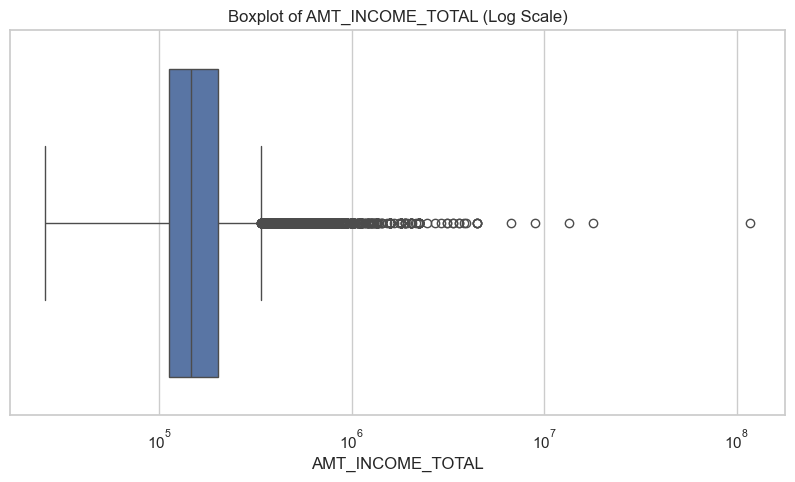

In [61]:
plot_boxplot_logx(app_train, 'AMT_INCOME_TOTAL')

Based on the summary statistics of 'AMT_INCOME_TOTAL', it's evident that the distribution of income is highly right-skewed, as indicated by the large difference between the mean and median (50th percentile). The mean income is approximately 168,798, while the median income is 147,150. Additionally, there is a wide range of income values, with the maximum income being 117,000,000.

In [62]:
income_outliers = classify_outliers(app_train, 'AMT_INCOME_TOTAL')
income_inliers = app_train.drop(income_outliers.index)

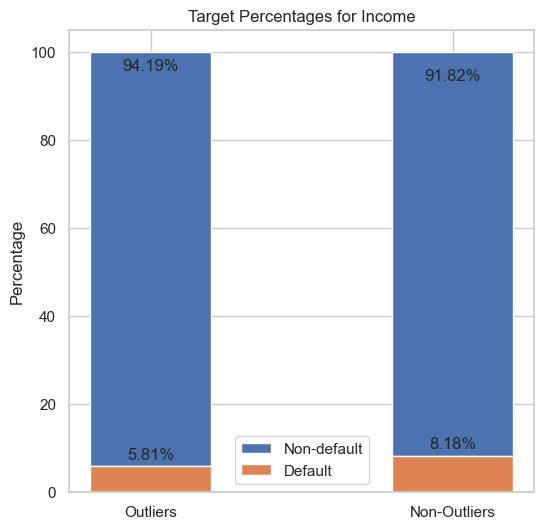

In [63]:
plot_target_percentages(income_outliers, income_inliers, 'Target Percentages for Income')

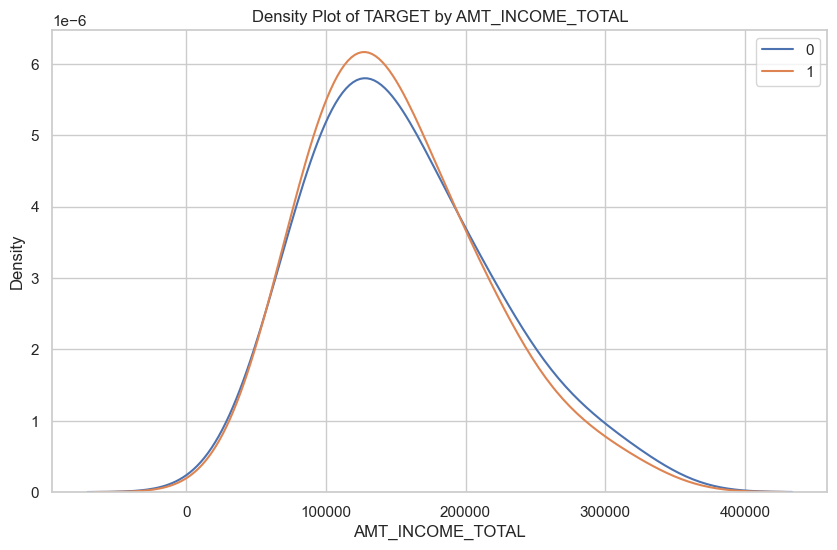

In [64]:
plot_AMT_comparison_num(income_inliers, 'TARGET', 'AMT_INCOME_TOTAL')

Based on the analysis, it appears that borrowers with higher total income tend to have a lower default rate compared to those with lower total income. This conclusion suggests that there might be a correlation between income level and loan default likelihood in the dataset.

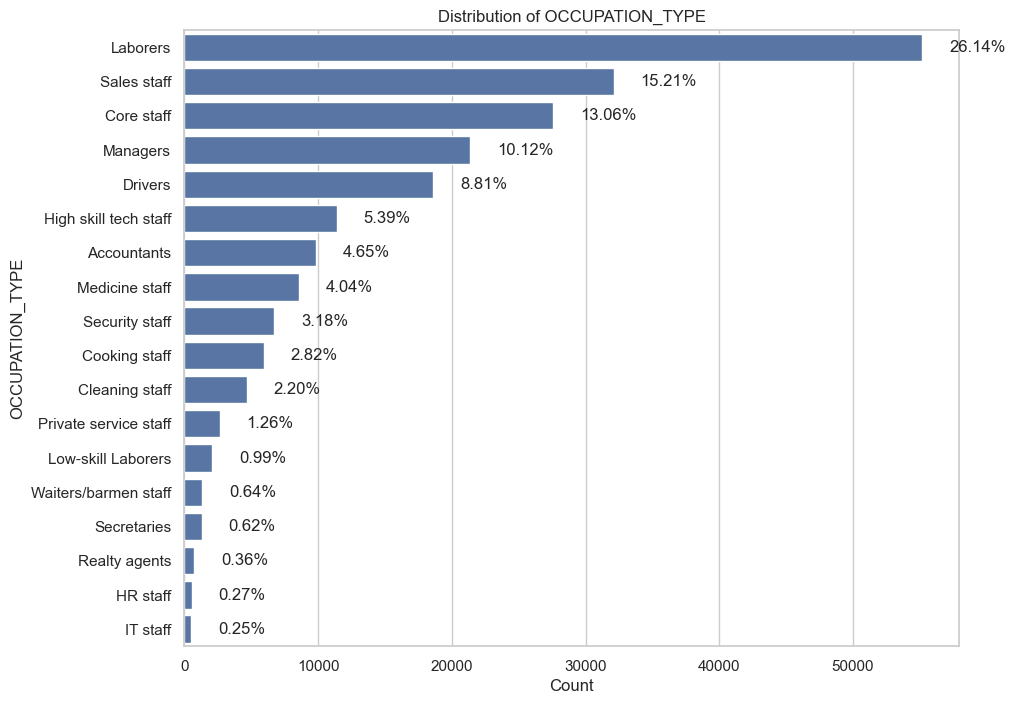

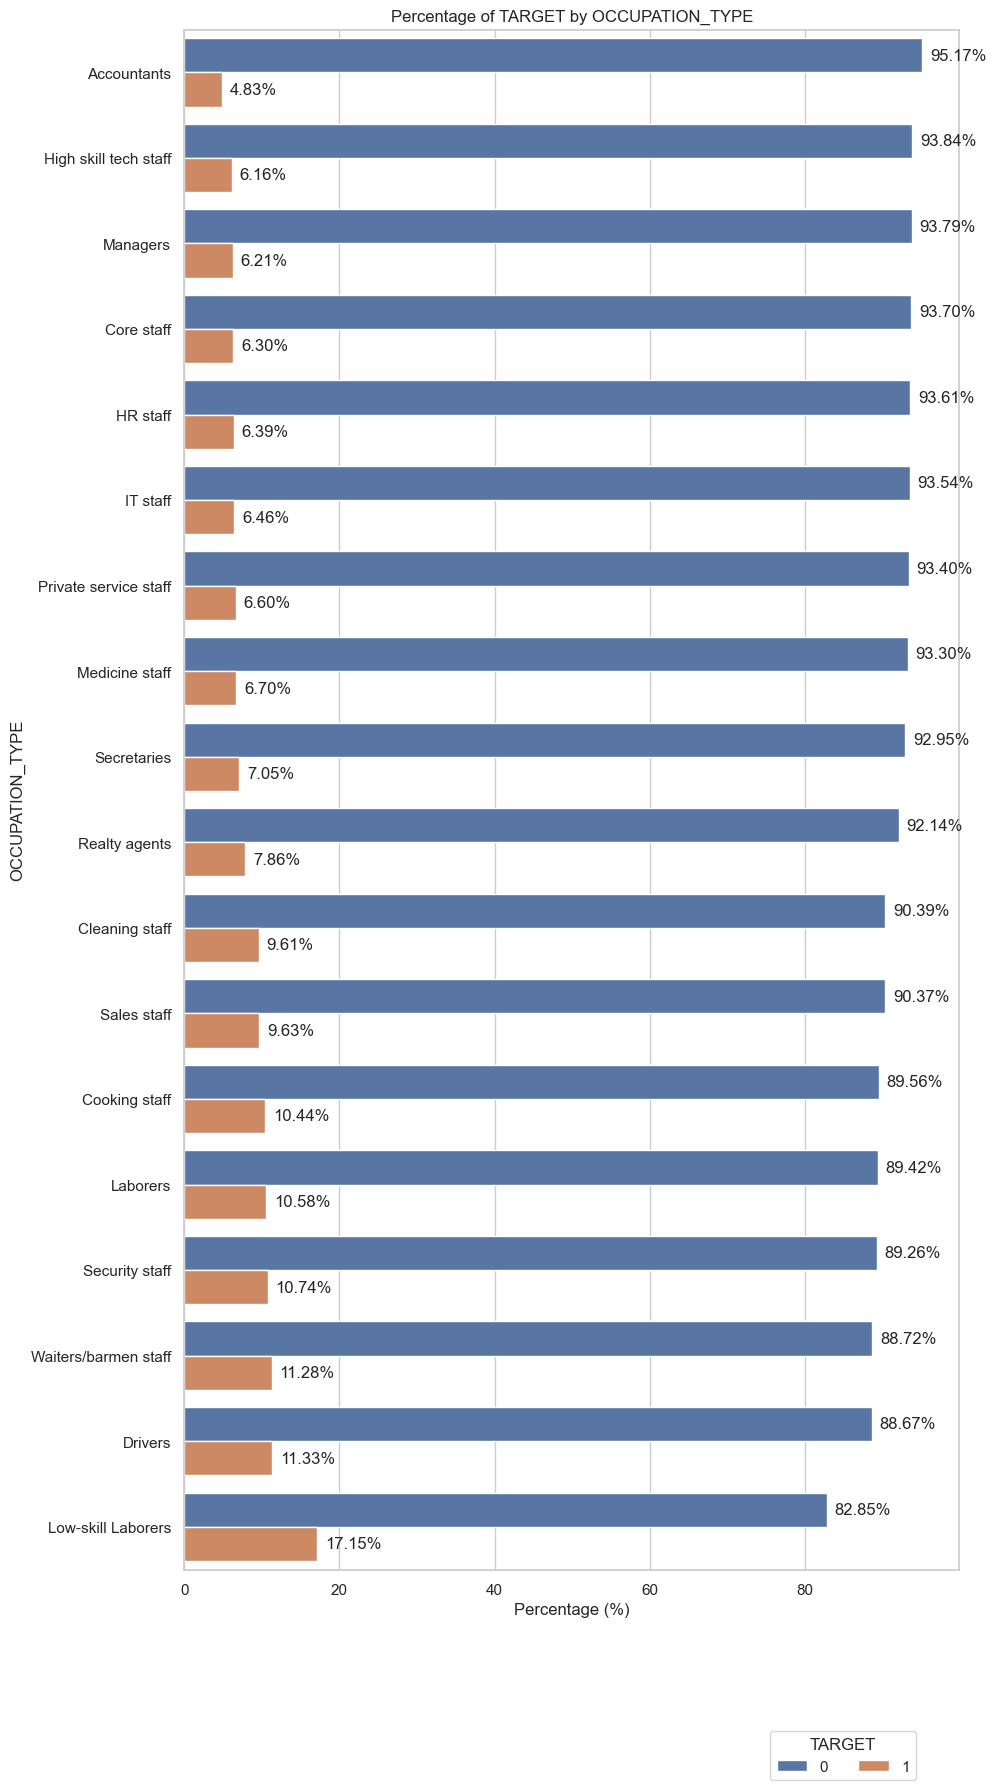

In [65]:
plot_cat_feature_distribution(app_train, "OCCUPATION_TYPE")
plot_cat_feature_target_re(app_train, "OCCUPATION_TYPE")

In [66]:
occupation_target_avg_df = calculate_feature_stats(app_train, "OCCUPATION_TYPE")
occupation_target_avg_df_formatted = occupation_target_avg_df.map(format_with_commas)

print(occupation_target_avg_df_formatted)

          OCCUPATION_TYPE Non-Default Default AMT_INCOME_TOTAL  AMT_CREDIT
9      Low-skill Laborers       82.85   17.15       133,228.00  458,464.78
4                 Drivers       88.67   11.33       187,011.61  612,333.97
17   Waiters/barmen staff       88.72   11.28       144,272.58  491,451.97
16         Security staff       89.26   10.74       149,662.70  557,080.29
8                Laborers       89.42   10.58       166,357.48  570,618.00
2           Cooking staff       89.56   10.44       138,396.51  539,174.32
14            Sales staff       90.37    9.63       152,302.87  563,258.49
1          Cleaning staff       90.39    9.61       130,790.90  510,960.95
13          Realty agents       92.14    7.86       195,003.99  655,275.65
15            Secretaries       92.95    7.05       160,541.66  593,520.41
11         Medicine staff       93.30    6.70       149,709.64  607,430.70
12  Private service staff       93.40    6.60       182,334.81  630,664.50
7                IT staff

The table presents the percentage of default and non-default loans for various occupation types, alongside their corresponding average income total and average credit amount. Notably, certain occupations such as "Low-skill Laborers," "Drivers," and "Waiters/barmen staff" demonstrate a relatively higher percentage of default loans, ranging from approximately 10% to 17%. Conversely, professions like "Accountants," "High skill tech staff," and "Managers" exhibit a lower default rate, ranging from around 4% to 7%. Interestingly, there is significant disparity in average income total and average credit amount across different occupation types. For instance, "Managers" command the highest average income total of approximately 260,336.68, while "Low-skill Laborers" have the lowest average income total of about 133,228.00. Likewise, "Managers" also secure the highest average credit amount of around 775,091.19, contrasting with "Cleaning staff," which have the lowest average credit amount of approximately 510,960.95. These findings suggest a correlation between occupation type, default rates, average income total, and average credit amount, underscoring the importance of socioeconomic factors in loan repayment behavior.

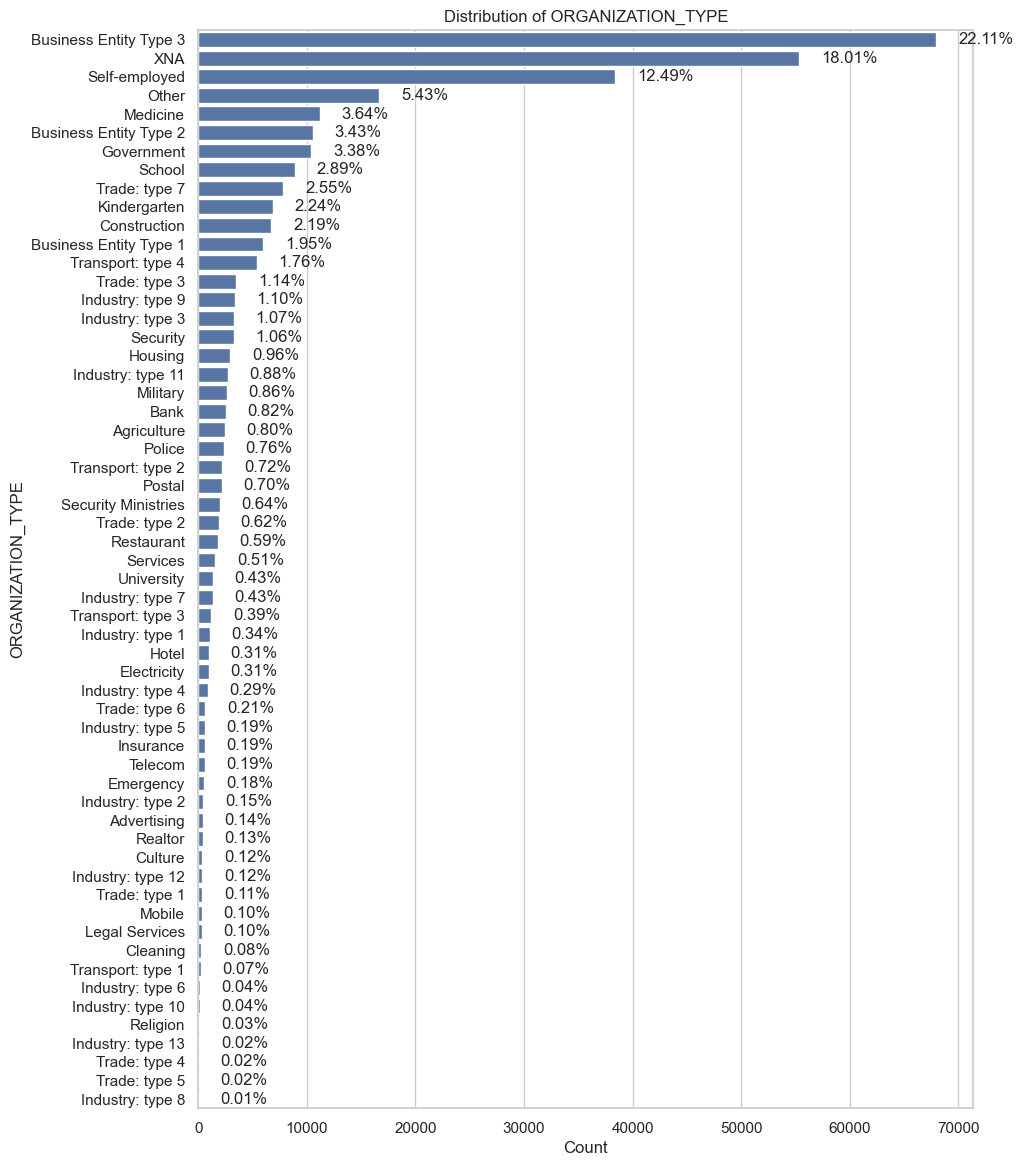

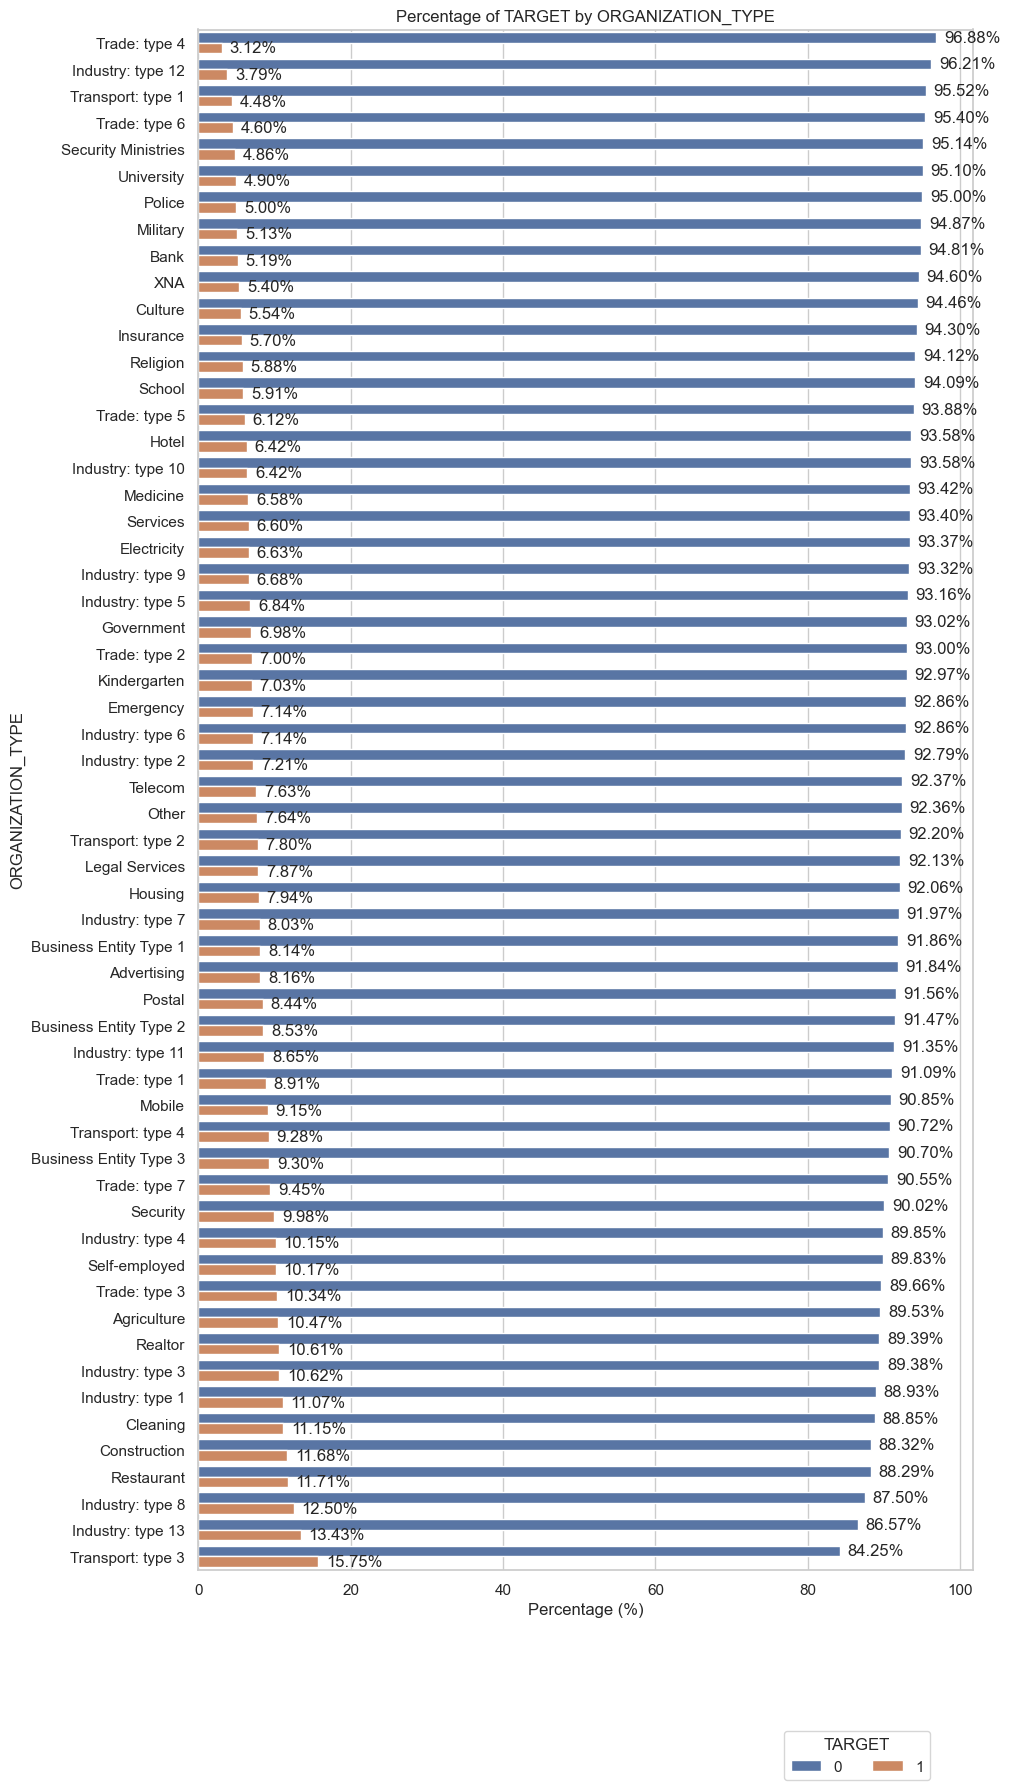

In [67]:
plot_cat_feature_distribution(app_train, "ORGANIZATION_TYPE")
plot_cat_feature_target_re(app_train, "ORGANIZATION_TYPE")

In [68]:
organization_target_avg_df = calculate_feature_stats(app_train, "ORGANIZATION_TYPE")
organization_target_avg_df_formatted = organization_target_avg_df.map(format_with_commas)


print(organization_target_avg_df_formatted)


         ORGANIZATION_TYPE Non-Default Default AMT_INCOME_TOTAL  AMT_CREDIT
54       Transport: type 3       84.25   15.75       175,571.65  534,434.96
18       Industry: type 13       86.57   13.43       147,915.67  557,712.67
25        Industry: type 8       87.50   12.50       172,537.50  667,101.19
38              Restaurant       88.29   11.71       158,203.90  542,657.95
7             Construction       88.32   11.68       200,227.86  639,995.55
6                 Cleaning       88.85   11.15       154,220.19  549,957.98
14        Industry: type 1       88.93   11.07       173,310.12  594,536.15
20        Industry: type 3       89.38   10.62       148,759.14  548,445.48
36                 Realtor       89.39   10.61       222,954.55  727,702.47
1              Agriculture       89.53   10.47       143,024.49  559,028.74
47           Trade: type 3       89.66   10.34       160,481.65  575,799.38
42           Self-employed       89.83   10.17       167,442.39  589,041.81
21        In

The organization types with the highest default rates tend to be those associated with lower-income occupations, such as "Transport: type 3" and "Industry: type 13". Conversely, organization types with lower default rates are typically linked to higher-income professions, such as "Trade: type 4" and "Industry: type 12". Additionally, there appears to be a correlation between average income and default rates, with higher-income organizations generally experiencing lower default rates compared to lower-income ones.

In [69]:
app_train["DAYS_EMPLOYED"].describe()

count    307511.000000
mean      63815.045904
std      141275.766519
min      -17912.000000
25%       -2760.000000
50%       -1213.000000
75%        -289.000000
max      365243.000000
Name: DAYS_EMPLOYED, dtype: float64

In [70]:
below_zero = app_train[app_train["DAYS_EMPLOYED"] < 0]["DAYS_EMPLOYED"].count()
above_zero = app_train[app_train["DAYS_EMPLOYED"] > 0]["DAYS_EMPLOYED"].count()

print("Counts where values are below zero:", below_zero)
print("Counts where values are above zero:", above_zero)

Counts where values are below zero: 252135
Counts where values are above zero: 55374


In [71]:
unique_org_types_above_zero = app_train[app_train['DAYS_EMPLOYED'] >= 0]['ORGANIZATION_TYPE'].unique()
unique_org_types_below_zero = app_train[app_train['DAYS_EMPLOYED'] < 0]['ORGANIZATION_TYPE'].unique()

print("Unique organization types for employed individuals (above zero DAYS_EMPLOYED):", unique_org_types_above_zero)
print("Unique organization types for unemployed individuals (below zero DAYS_EMPLOYED):", unique_org_types_below_zero)


Unique organization types for employed individuals (above zero DAYS_EMPLOYED): ['XNA' 'Business Entity Type 1' 'Self-employed']
Unique organization types for unemployed individuals (below zero DAYS_EMPLOYED): ['Business Entity Type 3' 'School' 'Government' 'Religion' 'Other'
 'Electricity' 'Medicine' 'Business Entity Type 2' 'Self-employed'
 'Transport: type 2' 'Construction' 'Housing' 'Kindergarten'
 'Trade: type 7' 'Industry: type 11' 'Military' 'Services'
 'Security Ministries' 'Transport: type 4' 'Industry: type 1' 'Emergency'
 'Security' 'Trade: type 2' 'University' 'Transport: type 3' 'Police'
 'Business Entity Type 1' 'Postal' 'Industry: type 4' 'Agriculture'
 'Restaurant' 'Culture' 'Hotel' 'Industry: type 7' 'Trade: type 3'
 'Industry: type 3' 'Bank' 'Industry: type 9' 'Insurance' 'Trade: type 6'
 'Industry: type 2' 'Transport: type 1' 'Industry: type 12' 'Mobile'
 'Trade: type 1' 'Industry: type 5' 'Industry: type 10' 'Legal Services'
 'Advertising' 'Trade: type 5' 'Cleaning' 

DAYS_EMPLOYED signifies the duration in days before the loan application when the individual commenced their current employment. Positive values usually denote diverse forms of employment, with a notable portion indicating self-employment. Consequently, our analysis will focus solely on negative values.

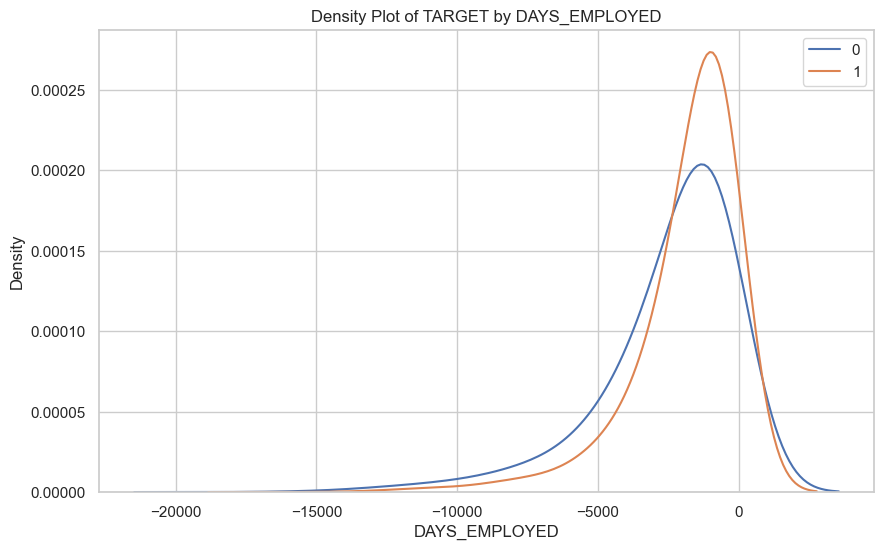

In [72]:
filtered_df = app_train[app_train['DAYS_EMPLOYED'] <= 0]
plot_AMT_comparison_num(filtered_df, 'TARGET', 'DAYS_EMPLOYED')

The graph illustrates a trend where clients with shorter durations in their current employment position are more prone to defaulting on their loans. This suggests a potential correlation between shorter work experience and higher default rates.

**Ownership Data**

In [73]:
features = [
    "FLAG_OWN_CAR",
    "OWN_CAR_AGE",
    "FLAG_OWN_REALTY",
    "NAME_HOUSING_TYPE"
]

In [74]:
print(get_column_description(column_description, features))

FLAG_OWN_CAR: Flag if the client owns a car
OWN_CAR_AGE: Age of client's car
FLAG_OWN_REALTY: Flag if client owns a house or flat
NAME_HOUSING_TYPE: What is the housing situation of the client (renting, living with parents, ...)



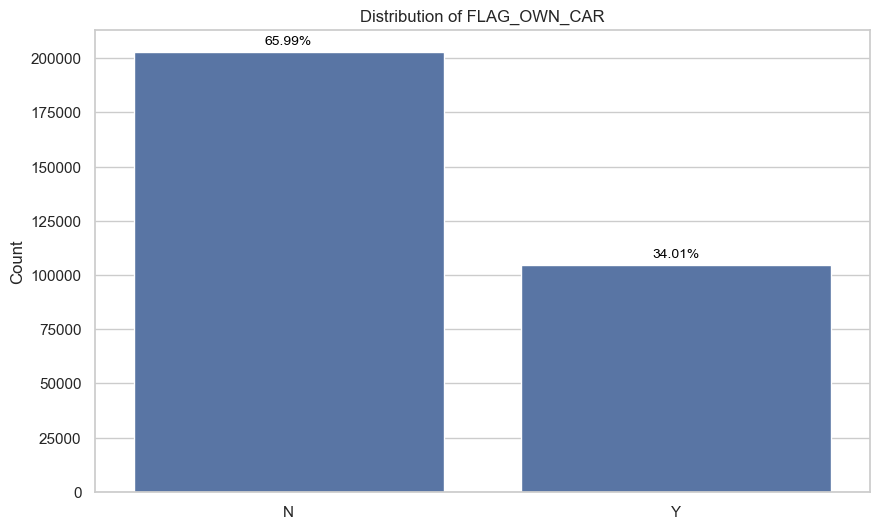

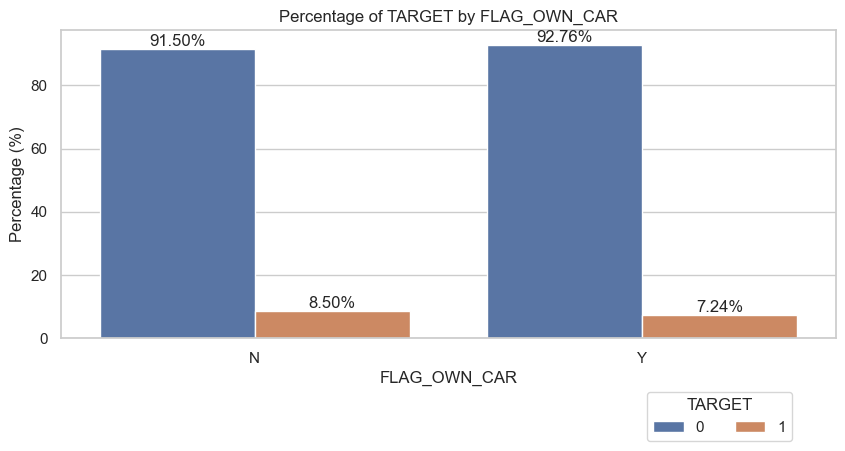

In [75]:
plot_cat_feature_distribution(app_train, "FLAG_OWN_CAR")
plot_cat_feature_target_re(app_train, "FLAG_OWN_CAR")

The analysis suggests that car ownership alone may not significantly influence the loan default rate. However, there is a slight increase in the default rate among individuals who do not own a car compared to those who do. Specifically, the default rate is 8.50% for non-car owners, slightly higher than the 7.24% default rate observed among car owners. 

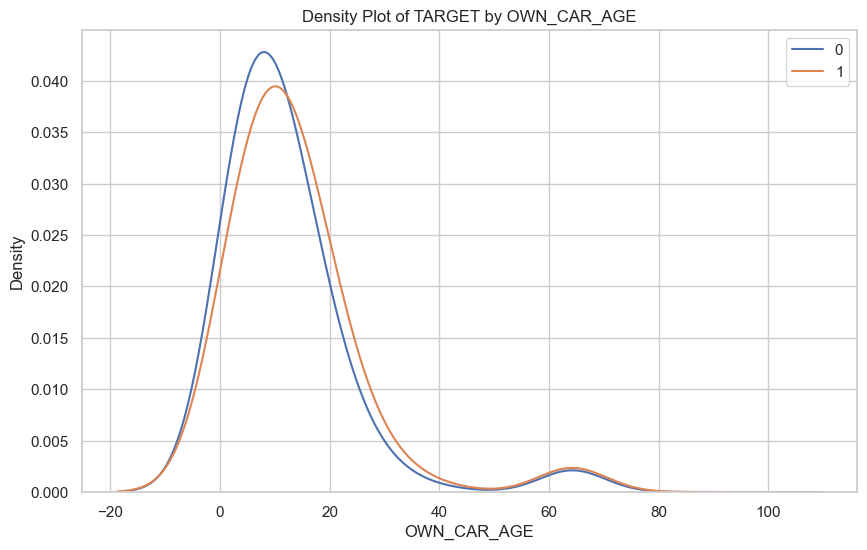

In [76]:
plot_AMT_comparison_num(app_train, 'TARGET', "OWN_CAR_AGE")

The density graph depicting car age suggests a notable trend: individuals with older cars tend to have a higher likelihood of defaulting on loans. This observation supports the notion that those with lower accumulated wealth or lower income levels are at higher risk of defaulting on loans. Older cars may indicate financial constraints or limited resources, which could translate to increased susceptibility to loan defaults.

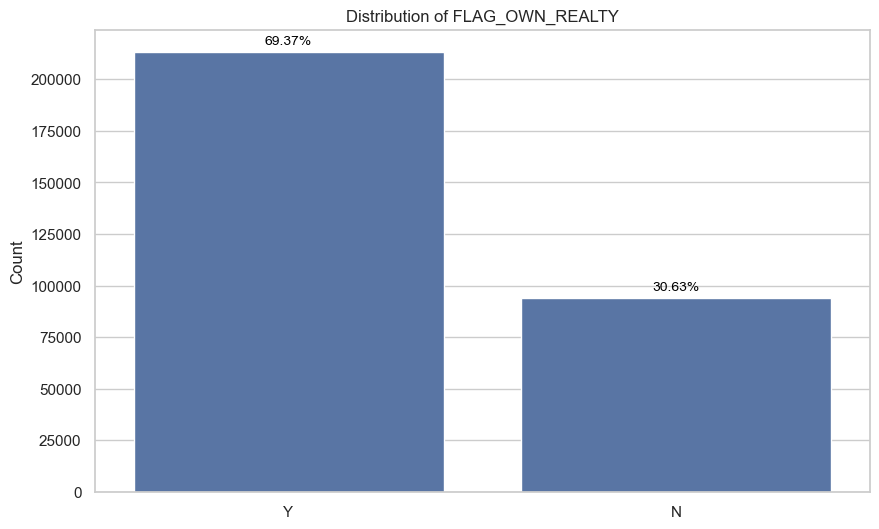

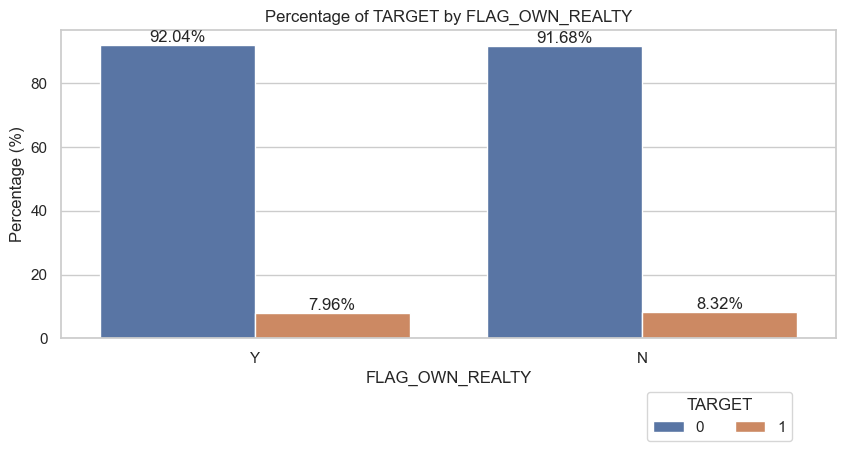

In [77]:
plot_cat_feature_distribution(app_train, "FLAG_OWN_REALTY")
plot_cat_feature_target_re(app_train, "FLAG_OWN_REALTY")

The analysis reveals that homeownership status, specifically owning realty, does not significantly influence loan default rates. However, a marginal increase in default rates is observed among individuals who do not own realty, with a default rate of 8.32% compared to 7.96% for those who do own realty. While the effect is slight, it suggests that homeownership may play a minor role in loan default likelihood, albeit less impactful compared to other factors.

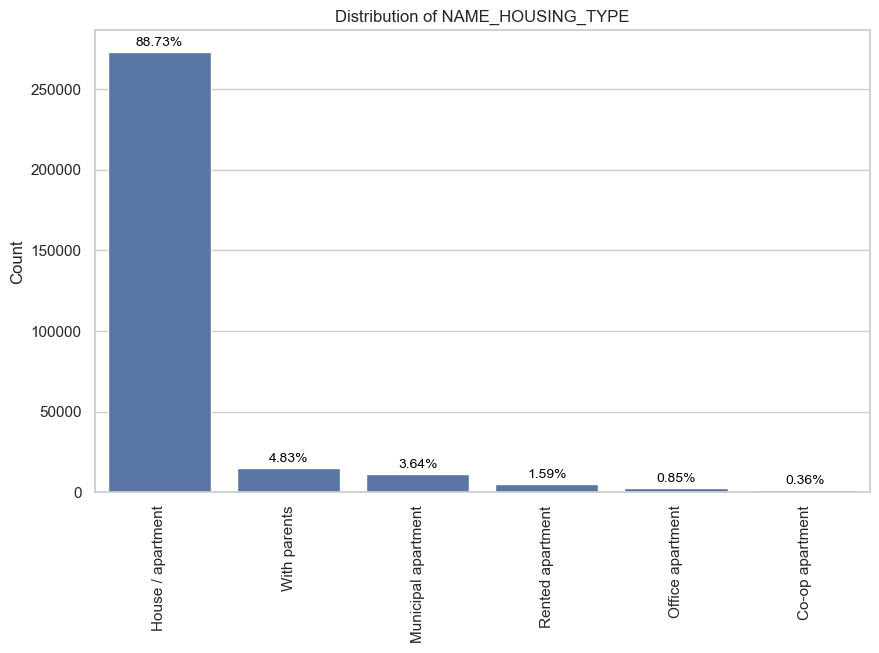

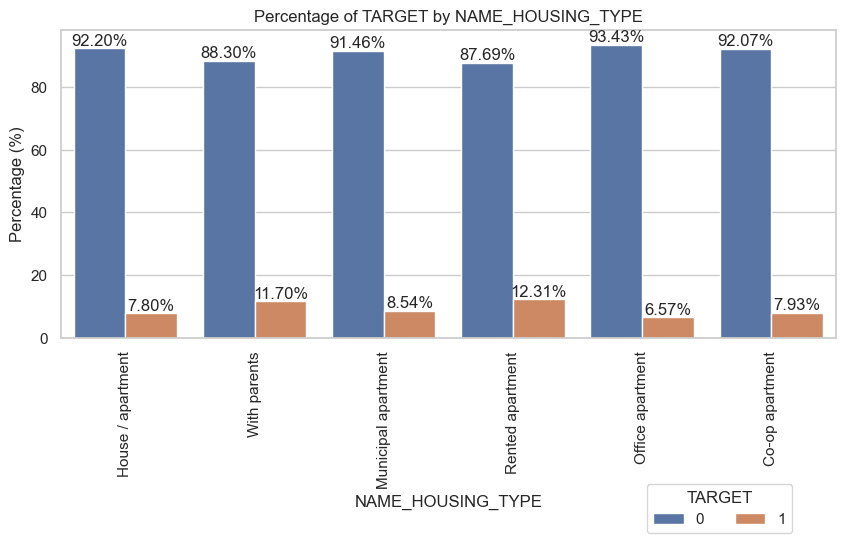

In [78]:
plot_cat_feature_distribution(app_train, "NAME_HOUSING_TYPE")
plot_cat_feature_target_re(app_train, "NAME_HOUSING_TYPE")

The data analysis indicates that individuals living in rented apartments or with their parents exhibit higher loan default rates compared to those residing in other housing arrangements. This suggests a potential correlation between living situation and loan repayment behavior, with renters and individuals living with parents being associated with increased default risk. Such insights underscore the importance of considering housing status as a contributing factor in assessing creditworthiness and loan repayment likelihood.

In [79]:
chi_squared_test_for_features(app_train, features)

Chi-squared test results for FLAG_OWN_CAR:
Chi-squared statistic: 146.65601825576024
P-value: 9.330994431109667e-34
Conclusion: There is a significant association between FLAG_OWN_CAR and TARGET.

Chi-squared test results for OWN_CAR_AGE:
Chi-squared statistic: 423.99249836832126
P-value: 8.695299944334442e-56
Conclusion: There is a significant association between OWN_CAR_AGE and TARGET.

Chi-squared test results for FLAG_OWN_REALTY:
Chi-squared statistic: 11.57582729808418
P-value: 0.0006681470317545887
Conclusion: There is a significant association between FLAG_OWN_REALTY and TARGET.

Chi-squared test results for NAME_HOUSING_TYPE:
Chi-squared statistic: 420.55618983894664
P-value: 1.0990890032617707e-88
Conclusion: There is a significant association between NAME_HOUSING_TYPE and TARGET.



### Exploratory Data Analysis on External Sources Information

In [80]:
features = [
    "EXT_SOURCE_1",
    "EXT_SOURCE_2",
    "EXT_SOURCE_3"
]

In [81]:
print(get_column_description(column_description, features))

EXT_SOURCE_1: Normalized score from external data source
EXT_SOURCE_2: Normalized score from external data source
EXT_SOURCE_3: Normalized score from external data source



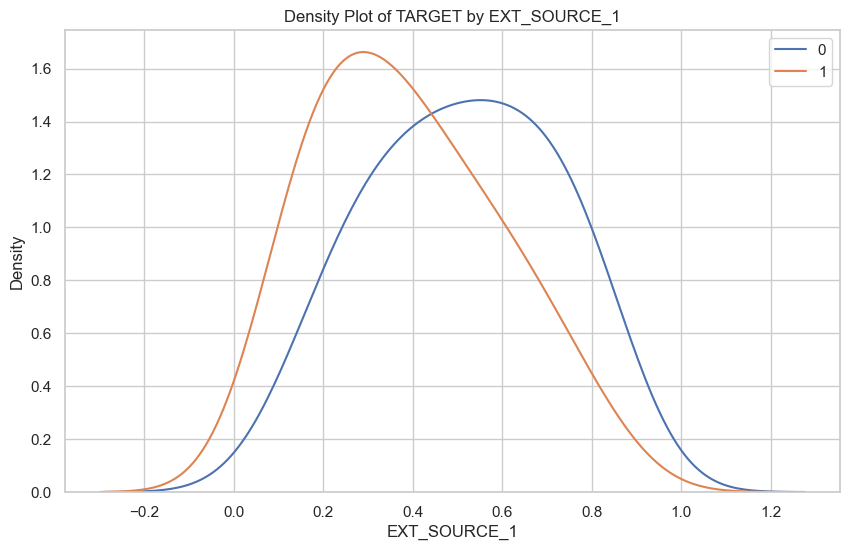

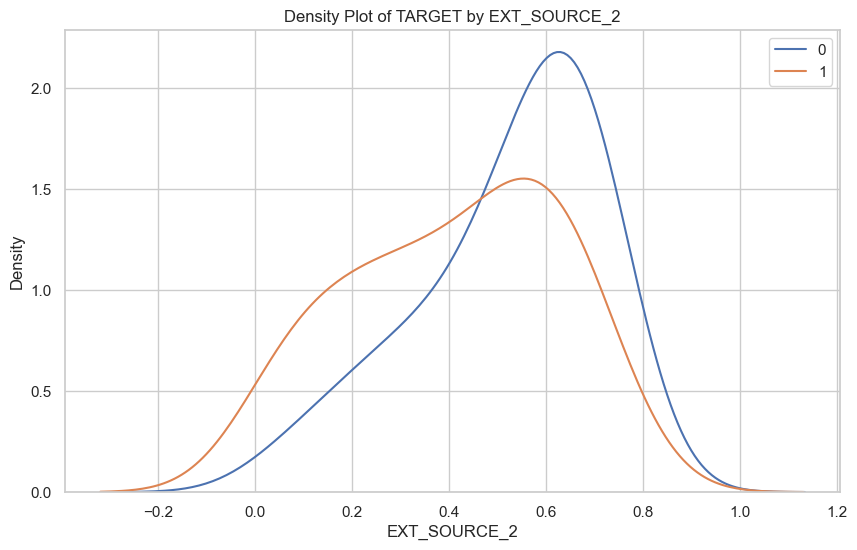

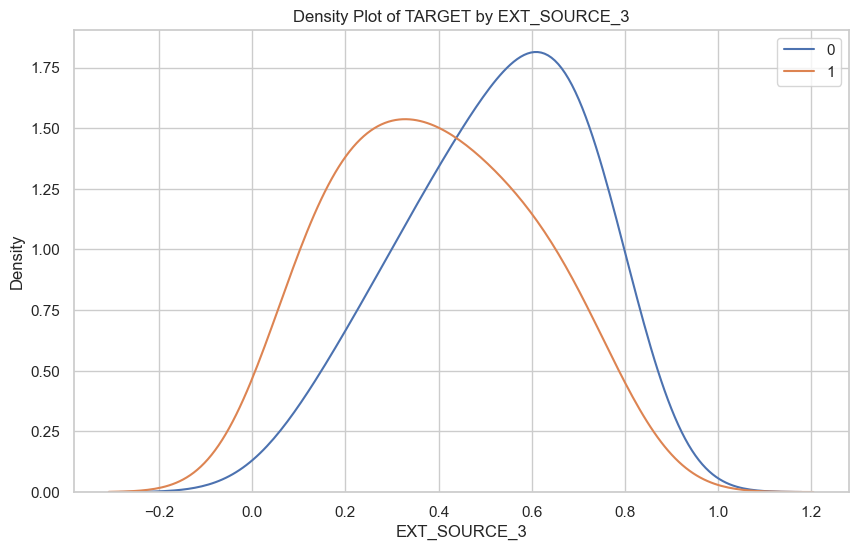

In [82]:
for feature in features:

    filtered_df = app_train.dropna(subset=feature)
    plot_AMT_comparison_num(filtered_df, 'TARGET', feature)

The density plots for EXT_SOURCE_1, EXT_SOURCE_2, and EXT_SOURCE_3 with respect to the target value show a clear trend: as the normalized score from external data sources decreases, the likelihood of loan default increases. This suggests that applicants with lower scores from these external sources may represent a higher risk for defaulting on loans.

It's important to note that while these external scores seem to correlate with loan default rates, there is no information provided about the sources of the external data. Hence, further investigation into the reliability and relevance of these external data sources would be prudent before drawing definitive conclusions about their predictive power.

## Conclusions

The analysis of the dataset reveals several significant trends regarding loan default risk and its associated factors. Firstly, it's evident that the dataset suffers from a substantial class imbalance, with a vast majority of instances categorized as non-default. This emphasizes the need for careful handling of imbalanced data when building predictive models or conducting risk assessments.

Examining the relationship between loan types and default risk reveals that individuals with cash loans are more susceptible to default compared to those with revolving loans. This suggests that the nature of the loan product itself can influence default probabilities, warranting tailored risk management strategies for different loan types.

Further exploration into the distribution of loan amounts and annuity payments uncovers intriguing patterns. Defaulted loans tend to cluster around lower credit amounts and exhibit higher densities in average annuity payments, particularly decreasing over time compared to non-default loans. These findings underscore the importance of judicious lending practices, especially for smaller to medium-sized loans.

Gender emerges as a noteworthy factor, with females displaying a tendency towards smaller loans and lower annuity payments, indicative of a more risk-averse financial approach. Moreover, the analysis suggests a correlation between higher education levels and lower default rates, hinting at the influence of educational attainment on financial responsibility.

Age also plays a significant role, as younger individuals exhibit a higher likelihood of defaulting on loans compared to older counterparts. This highlights the importance of considering age demographics in risk assessment and lending decisions. Additionally, housing situation and car age appear to be associated with default risk, with renters, individuals living with parents, and owners of older cars showing higher default rates.

In summary, these findings provide valuable insights into the multifaceted nature of loan default risk, emphasizing the importance of considering diverse demographic, socioeconomic, and behavioral factors in credit risk assessment and decision-making processes within the lending industry.